## Janine Ali Ahmad - Lou Girault - TDA

# Importations

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
from matplotlib import pyplot as plt
import seaborn as sns


# Exploration des données

## I- Chargement des données

In [2]:
airbnb_train = pd.read_csv("airbnb_train.csv")
airbnb_train

id  log_price property_type        room_type  \
0       5708593   4.317488         House     Private room   
1      14483613   4.007333         House     Private room   
2      10412649   7.090077     Apartment  Entire home/apt   
3      17954362   3.555348         House     Private room   
4       9969781   5.480639         House  Entire home/apt   
...         ...        ...           ...              ...   
22229  11989532   4.605170     Apartment     Private room   
22230  20652462   5.043425     Apartment  Entire home/apt   
22231  12380210   5.220356     Apartment  Entire home/apt   
22232  19533966   5.273000     Apartment  Entire home/apt   
22233  18507240   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {TV,"Wireless Internet",Kitchen,"Free parking ...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             4   
2      {TV,"Wireless Internet","Air conditioning",Kit...             6   
3      {TV,"Cable TV",Internet,"Wireless Internet","A...             1   
4      {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
...                                                  ...           ...   
22229                                                 {}             1   
22230  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
22231  {TV,Internet,"Wireless Internet","Air conditio...             5   
22232  {TV,"Wireless Internet","Air conditioning",Kit...             2   
22233  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee  ... last_review  \
0            1.0  Real Bed            flexible         False  ...         NaN   
1            2.0  Real Bed              strict         False  ...  2017-09-17   
2            2.0  Real Bed            flexible         False  ...         NaN   
3            1.0  Real Bed            flexible          True  ...  2017-09-29   
4            1.0  Real Bed            moderate          True  ...  2017-08-28   
...          ...       ...                 ...           ...  ...         ...   
22229        1.0  Real Bed            flexible         False  ...         NaN   
22230        2.0  Real Bed            moderate          True  ...  2017-04-15   
22231        1.0  Real Bed            moderate          True  ...  2017-09-10   
22232        1.0  Real Bed              strict          True  ...         NaN   
22233        1.0  Real Bed            moderate         False  ...  2017-04-30   

        latitude   longitude  \
0      33.782712 -118.134410   
1      40.705468  -73.909439   
2      38.917537  -77.031651   
3      40.736001  -73.924248   
4      37.744896 -122.430665   
...          ...         ...   
22229  40.709025  -73.939405   
22230  33.871549 -118.396053   
22231  40.706749  -73.942377   
22232  40.738535  -74.000157   
22233  33.761096 -118.192409   

                                                    name      neighbourhood  \
0                                Island style Spa Studio         Long Beach   
1      Beautiful and Simple Room W/2 Beds, 25 Mins to...          Ridgewood   
2      2br/2ba luxury condo perfect for infant / toddler  U Street Corridor   
3       Manhattan view from Queens. Lovely single room .          Sunnyside   
4                          Zen Captured Noe Valley House         Noe Valley   
...                                                  ...                ...   
22229                                  one room bushwick       Williamsburg   
22230                       Spacious Hermosa 2 BR on PCH      Hermosa Beach   
22231         Modern 2 Bedroom Apartment in Williamsburg       Williamsburg   
22232               Designer's Apartment in HEART of NYC       West Village   
22233                     Cozy Boat at Shoreline Village         Long Beach   

      number_of_reviews review_scores_rating  zipcode bedrooms  beds  
0            

In [3]:
airbnb_test = pd.read_csv("airbnb_test.csv")
airbnb_test

Unnamed: 0 property_type        room_type  \
0        14282777     Apartment  Entire home/apt   
1        17029381     Apartment  Entire home/apt   
2         7824740     Apartment  Entire home/apt   
3        19811650         House  Entire home/apt   
4        12410741     Apartment  Entire home/apt   
...           ...           ...              ...   
51872    14844128         House  Entire home/apt   
51873    16051971         House  Entire home/apt   
51874    16429629     Apartment  Entire home/apt   
51875      324969         House     Private room   
51876     9684189     Apartment  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Air condit...             5   
3      {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
4      {TV,Internet,"Wireless Internet","Air conditio...             2   
...                                                  ...           ...   
51872  {TV,"Cable TV",Internet,"Wireless Internet","A...             4   
51873  {TV,"Cable TV",Internet,"Wireless Internet","A...             4   
51874  {TV,"Wireless Internet","Air conditioning",Kit...             3   
51875  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
51876  {TV,"Cable TV","Wireless Internet",Kitchen,Gym...             3   

       bathrooms  bed_type cancellation_policy  cleaning_fee city  ...  \
0            1.0  Real Bed              strict          True  NYC  ...   
1            1.0  Real Bed              strict          True  NYC  ...   
2            1.0  Real Bed            moderate          True  NYC  ...   
3            1.0  Real Bed            flexible          True   SF  ...   
4            1.0  Real Bed            moderate          True   DC  ...   
...          ...       ...                 ...           ...  ...  ...   
51872        1.0  Real Bed            flexible         False   LA  ...   
51873        1.0  Real Bed            moderate          True  NYC  ...   
51874        1.0  Real Bed              strict          True  NYC  ...   
51875        1.0  Real Bed            moderate          True   LA  ...   
51876        1.0  Real Bed            flexible          True   SF  ...   

      last_review   latitude   longitude  \
0      2016-07-18  40.696524  -73.991617   
1      2017-09-23  40.766115  -73.989040   
2      2017-09-14  40.808110  -73.943756   
3             NaN  37.772004 -122.431619   
4      2017-01-22  38.925627  -77.034596   
...           ...        ...         ...   
51872         NaN  34.156056 -118.235445   
51873  2017-08-20  40.765323  -73.961502   
51874  2017-09-24  40.770700  -73.963228   
51875  2017-03-25  34.099417 -118.276401   
51876         NaN  37.777291 -122.412377   

                                                    name     neighbourhood  \
0                         Beautiful brownstone 1-bedroom  Brooklyn Heights   
1               Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                                       The Garden Oasis            Harlem   
3                     Beautiful Flat in the Heart of SF!      Lower Haight   
4                             Great studio in midtown DC  Columbia Heights   
...                                                  ...               ...   
51872                        Lovely home in a Great City          Glendale   
51873  Penthouse 2BR w skylight,terrace, and a roof d...   Upper East Side   
51874               Comfy UES apt close to Central Park!   Upper East Side   
51875                Cozy room1; Silverlake, Los Angeles         Los Feliz   
51876                            Beautiful & New Jr 1BD-              SoMa   

      number_of_reviews review_scores_rating  zipcode  bedrooms  beds  
0                     2                100.0    11201       1.0   

## II- Exploration des données

In [4]:
airbnb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22234 entries, 0 to 22233
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      22234 non-null  int64  
 1   log_price               22234 non-null  float64
 2   property_type           22234 non-null  object 
 3   room_type               22234 non-null  object 
 4   amenities               22234 non-null  object 
 5   accommodates            22234 non-null  int64  
 6   bathrooms               22183 non-null  float64
 7   bed_type                22234 non-null  object 
 8   cancellation_policy     22234 non-null  object 
 9   cleaning_fee            22234 non-null  bool   
 10  city                    22234 non-null  object 
 11  description             22234 non-null  object 
 12  first_review            17509 non-null  object 
 13  host_has_profile_pic    22178 non-null  object 
 14  host_identity_verified  22178 non-null

In [5]:
airbnb_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51877 entries, 0 to 51876
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              51877 non-null  int64  
 1   property_type           51877 non-null  object 
 2   room_type               51877 non-null  object 
 3   amenities               51877 non-null  object 
 4   accommodates            51877 non-null  int64  
 5   bathrooms               51728 non-null  float64
 6   bed_type                51877 non-null  object 
 7   cancellation_policy     51877 non-null  object 
 8   cleaning_fee            51877 non-null  bool   
 9   city                    51877 non-null  object 
 10  description             51877 non-null  object 
 11  first_review            40738 non-null  object 
 12  host_has_profile_pic    51745 non-null  object 
 13  host_identity_verified  51745 non-null  object 
 14  host_response_rate      39053 non-null

Nous cherchons à déterminer le nombre de valeurs manquantes pour chaque colonne.
#### Pour les données d'entraînement.

id--> nombre de valeurs manquantes: 0
log_price--> nombre de valeurs manquantes: 0
property_type--> nombre de valeurs manquantes: 0
room_type--> nombre de valeurs manquantes: 0
amenities--> nombre de valeurs manquantes: 0
accommodates--> nombre de valeurs manquantes: 0
bathrooms--> nombre de valeurs manquantes: 51
bed_type--> nombre de valeurs manquantes: 0
cancellation_policy--> nombre de valeurs manquantes: 0
cleaning_fee--> nombre de valeurs manquantes: 0
city--> nombre de valeurs manquantes: 0
description--> nombre de valeurs manquantes: 0
first_review--> nombre de valeurs manquantes: 4725
host_has_profile_pic--> nombre de valeurs manquantes: 56
host_identity_verified--> nombre de valeurs manquantes: 56
host_response_rate--> nombre de valeurs manquantes: 5475
host_since--> nombre de valeurs manquantes: 56
instant_bookable--> nombre de valeurs manquantes: 0
last_review--> nombre de valeurs manquantes: 4716
latitude--> nombre de valeurs manquantes: 0
longitude--> nombre de valeurs ma

<Axes: >

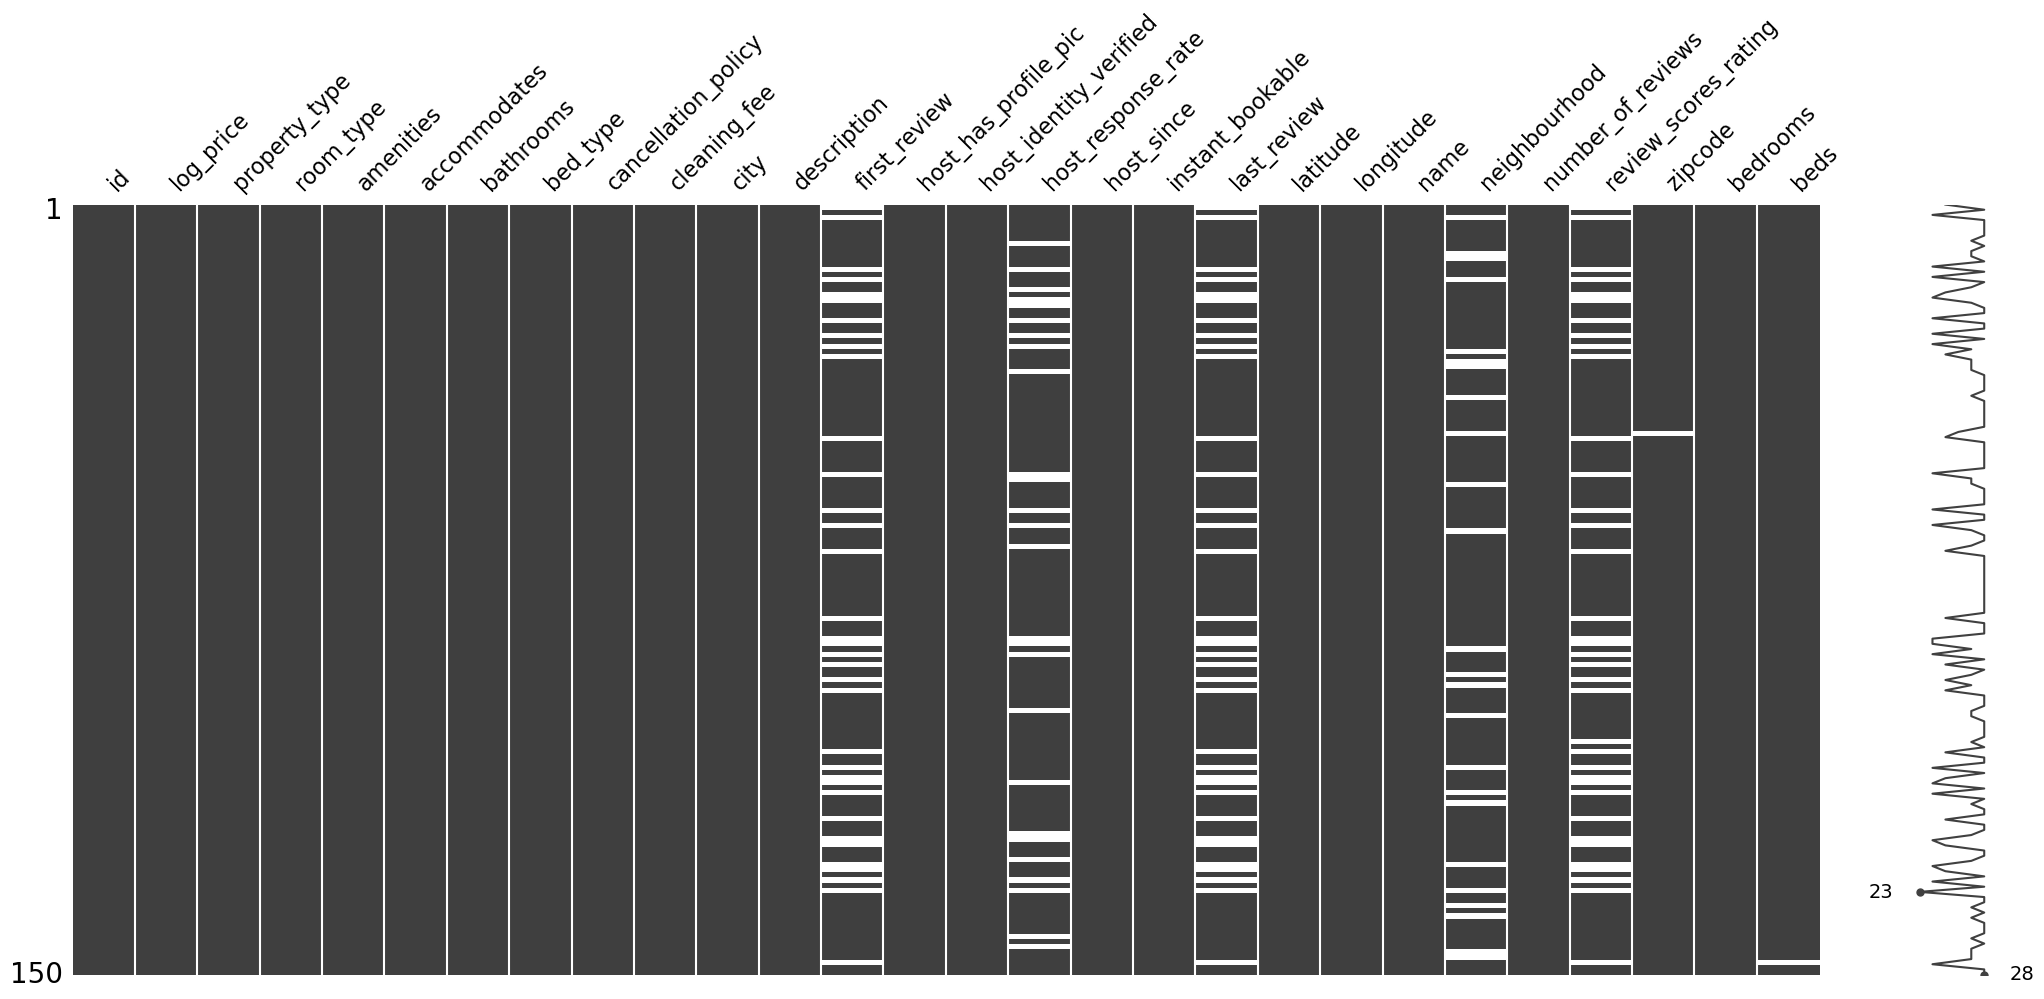

In [6]:
for colonne in airbnb_train.columns:
    print(colonne + '--> nombre de valeurs manquantes:', len(airbnb_train[colonne][airbnb_train[colonne].isnull()]))

msno.matrix(airbnb_train.sample(150))

#### Pour les données de test.

Unnamed: 0--> nombre de valeurs manquantes: 0
property_type--> nombre de valeurs manquantes: 0
room_type--> nombre de valeurs manquantes: 0
amenities--> nombre de valeurs manquantes: 0
accommodates--> nombre de valeurs manquantes: 0
bathrooms--> nombre de valeurs manquantes: 149
bed_type--> nombre de valeurs manquantes: 0
cancellation_policy--> nombre de valeurs manquantes: 0
cleaning_fee--> nombre de valeurs manquantes: 0
city--> nombre de valeurs manquantes: 0
description--> nombre de valeurs manquantes: 0
first_review--> nombre de valeurs manquantes: 11139
host_has_profile_pic--> nombre de valeurs manquantes: 132
host_identity_verified--> nombre de valeurs manquantes: 132
host_response_rate--> nombre de valeurs manquantes: 12824
host_since--> nombre de valeurs manquantes: 132
instant_bookable--> nombre de valeurs manquantes: 0
last_review--> nombre de valeurs manquantes: 11111
latitude--> nombre de valeurs manquantes: 0
longitude--> nombre de valeurs manquantes: 0
name--> nombre de 

<Axes: >

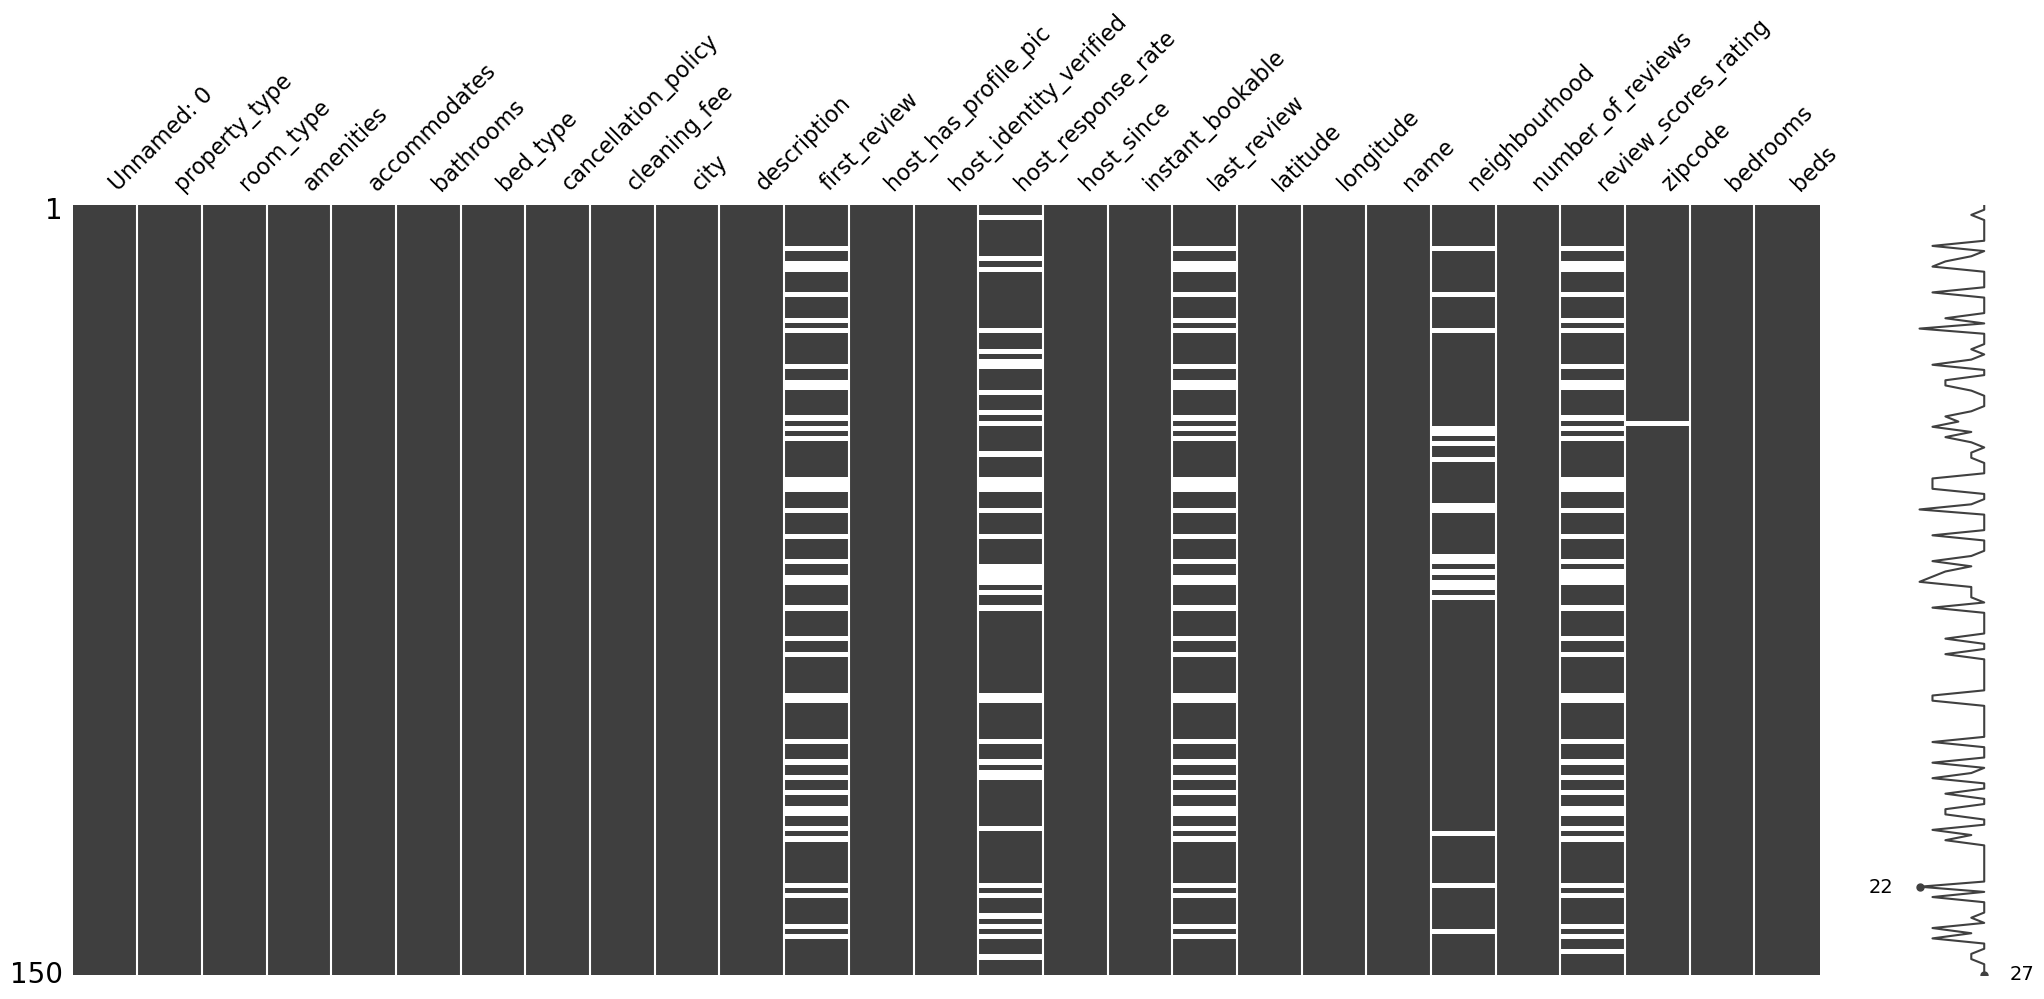

In [7]:
for colonne in airbnb_test.columns:
    print(colonne + '--> nombre de valeurs manquantes:', len(airbnb_test[colonne][airbnb_test[colonne].isnull()]))

msno.matrix(airbnb_test.sample(150))

On examine le contenu des colonnes qui nous intéressent, pour ensuite savoir comment procéder pour la transformation des données.

In [8]:
# Récupère les types de propriété (maison, appart etc...)
print("Données de train \n")

properties = airbnb_train["property_type"].unique()
print("Tous les types de propriétés : ", properties)
        
rooms = airbnb_train["room_type"].unique()
print("Tous les types de chambre : ", rooms)
        
beds = airbnb_train["bed_type"].unique()
print("Tous les types de lits : ", beds)
        
cancellations = airbnb_train["cancellation_policy"].unique()
print("Tous les politiques d'annulation : ", cancellations)
        
cleaning = airbnb_train["cleaning_fee"].unique()
print("Frais de nettoyage : ", cleaning)

cities = airbnb_train["city"].unique()
print("Toute les cites : ", cities)

host_profile = airbnb_train["host_has_profile_pic"].unique()
print("Toutes les valeurs pour la photo de profil de l'hôte : ", host_profile)

host_verified = airbnb_train["host_identity_verified"].unique()
print("Vérification de l'hôte : ", host_verified)

host_response = airbnb_train["host_response_rate"].unique()
print("Taux de réponse de l'hôte : ", host_response)

reservation_instantanee = airbnb_train["instant_bookable"].unique()
print("Réservation instantanée ou non : ", reservation_instantanee)

latitudes = airbnb_train["latitude"].unique()
print("Toutes les latitudes : ", latitudes)

longitudes = airbnb_train["longitude"].unique()
print("Toutes les longitudes : ", longitudes)

print("\nDonnées de test \n")

properties = airbnb_test["property_type"].unique()
print("Tous les types de propriétés : ", properties)
        
rooms = airbnb_test["room_type"].unique()
print("Tous les types de chambre : ", rooms)
        
beds = airbnb_test["bed_type"].unique()
print("Tous les types de lits : ", beds)
        
cancellations = airbnb_test["cancellation_policy"].unique()
print("Tous les politiques d'annulation : ", cancellations)
        
cleaning = airbnb_test["cleaning_fee"].unique()
print("Frais de nettoyage : ", cleaning)

cities = airbnb_test["city"].unique()
print("Toute les cites : ", cities)

host_profile = airbnb_test["host_has_profile_pic"].unique()
print("Toutes les valeurs pour la photo de profil de l'hôte : ", host_profile)

host_verified = airbnb_test["host_identity_verified"].unique()
print("Vérification de l'hôte : ", host_verified)

host_response = airbnb_test["host_response_rate"].unique()
print("Taux de réponse de l'hôte : ", host_response)

reservation_instantanee = airbnb_test["instant_bookable"].unique()
print("Réservation instantanée ou non : ", reservation_instantanee)

latitudes = airbnb_test["latitude"].unique()
print("Toutes les latitudes : ", latitudes)

longitudes = airbnb_test["longitude"].unique()
print("Toutes les longitudes : ", longitudes)

Données de train 

Tous les types de propriétés :  ['House' 'Apartment' 'Townhouse' 'Guest suite' 'Condominium' 'Timeshare'
 'Chalet' 'Guesthouse' 'Bungalow' 'Loft' 'In-law' 'Boat' 'Dorm' 'Other'
 'Bed & Breakfast' 'Camper/RV' 'Villa' 'Boutique hotel' 'Cabin' 'Hostel'
 'Hut' 'Yurt' 'Serviced apartment' 'Castle' 'Vacation home' 'Tent' 'Cave'
 'Tipi' 'Earth House' 'Island' 'Treehouse']
Tous les types de chambre :  ['Private room' 'Entire home/apt' 'Shared room']
Tous les types de lits :  ['Real Bed' 'Pull-out Sofa' 'Futon' 'Airbed' 'Couch']
Tous les politiques d'annulation :  ['flexible' 'strict' 'moderate' 'super_strict_30' 'super_strict_60']
Frais de nettoyage :  [False  True]
Toute les cites :  ['LA' 'NYC' 'DC' 'SF' 'Chicago' 'Boston']
Toutes les valeurs pour la photo de profil de l'hôte :  ['t' nan 'f']
Vérification de l'hôte :  ['f' 't' nan]
Taux de réponse de l'hôte :  [nan '100%' '80%' '86%' '90%' '89%' '40%' '81%' '70%' '99%' '0%' '20%'
 '67%' '56%' '43%' '75%' '94%' '88%' '95%' 

## III- Nettoyage des données

## III-a) Élimination des colonnes

Nous avons supprimé les colonnes qui ne sont pas significatives pour la prédiction des prix, ainsi que celles qui rendent la transformation des données difficile. Par exemple, nous avons éliminé la colonne de description et bien d'autres. Nous aurions souhaité conserver le code postal et éliminer la ville et le quartier, mais étant donné que le code postal présente des entrées difficiles à traiter, nous avons décidé de conserver la ville à laquelle nous attribuerons un indice.

In [9]:
def ElimineColonne(df): 
    # Liste des colonnes à éliminer
    efface=['id','Unnamed: 0','description', 'first_review','host_since','last_review','name','neighbourhood','zipcode']

    for colonne in efface:
        if colonne in df.columns:
            df = df.drop(columns=colonne)
    return df

airbnb_train=ElimineColonne(airbnb_train)
airbnb_test=ElimineColonne(airbnb_test)

## III- b) Élimination des entrées incohérentes

### Logiquement, nous aurions souhaité éliminer les lignes contenant des données incohérentes. Nous aurions également préféré éliminer les données non renseignées (NaN) au lieu de leur attribuer une valeur de 0, ce qui pourrait affecter notre analyse.
### Cependant, certaines colonnes contiennent de beaucoup de valeurs manquantes, il n'est donc pas raisonnable de supprimer toutes ces lignes et en supprimant ces colonnes, nous perdrions des informations necessaires.
### De plus, nous ne pouvons pas supprimer les lignes car notre fichier de prédictions ne serait pas conforme (nous aurions moins de prédictions dans le fichier, ce qui le rendrait incohérent). Nous avons donc décidé de suivre l'approche imposée en conservant ces incohérences. Cependant, voici une trace écrite de ce que nous voulions faire :

#### THEORIQUEMENT: Données manquantes et doublons
Nous procédons à l'élimination des lignes comportant des données non renseignées, à l'exception de la colonne 'review_scores_rating' car cette information en étant manquantes reste pertinente. 

In [10]:
def ElimineNaN(df):
    print("Nombre de lignes avant l'élimination des lignes:", df.shape[0])
    df = df.dropna(how='any', subset=['bathrooms', 'bedrooms', 'beds'])
    print("Nombre de lignes après l'élimination des lignes:", df.shape[0])

    return df

#airbnb_train=ElimineNaN_doublons(airbnb_train)
#airbnb_test=ElimineNaN_doublons(airbnb_test)


#### THEORIQUEMENT: Données incohérentes

On a examiné les entrées dans les données et on a trouvé certaines incohérences (par exemple, maison mais nombre de chambres 0). Nous avons donc choisi d'éliminer ces données illogiques.

Le prix des locations ne devrait pas être nul. Éliminer les entrées avec un prix nul aide à garantir que seules les locations avec des prix valides sont incluses dans l'analyse. De même, le nombre de personnes pouvant être logées ne devrait pas être nul, tout comme le nombre de chambres, de lits et de toilettes.

In [11]:
def ElimineIncoherence(df):
    if 'log_price' in df.columns:
        df = df[df['log_price'] != 0.00]
    df = df[df['accommodates'] != 0]
    df = df[df['bedrooms'] != 0]
    df = df[df['beds'] != 0]
    df = df[df['bathrooms'] != 0]

    print("Nombre de lignes après l'élimination des lignes:", df.shape[0])
    return df

#airbnb_train=ElimineIncoherence(airbnb_train)
#airbnb_test=ElimineIncoherence(airbnb_test)

###### Seule incohérence que l'on élimine ici

In [12]:
def ElimineIncoherence2(df):
    if 'log_price' in df.columns:
        df = df[df['log_price'] != 0.00]
    print("Nombre de lignes après l'élimination des lignes:", df.shape[0])
    return df

airbnb_train=ElimineIncoherence2(airbnb_train)


Nombre de lignes après l'élimination des lignes: 22234


## III-c) Transformation du contenu des colonnes.

#### Reviews NaN

Pour les scores de revue non renseignés, nous attribuons la valeur -1. Cette valeur est choisie plutôt que 0, car 0 pourrait être interprété comme une note de revue réelle. Le fait qu'il n'y ait pas de note de revue peut également fournir une information importante.Par conséquent, nous ne supprimons pas ces entrées, mais nous conservons plutôt l'information sur l'absence de note.

In [13]:
def Score_NaN(df):
    df['review_scores_rating'].fillna(-1, inplace=True)
    return df

airbnb_train=Score_NaN(airbnb_train)
airbnb_test=Score_NaN(airbnb_test)

#### Colonne 'amenities'
Pour la colonne 'amenities', nous avons décidé de remplacer les données par un entier indiquant le nombre d'aménagements disponibles pour la propriété.

In [14]:
def nb_amenities(ligne):
    return ligne['amenities'].count(',') + 1

airbnb_train['amenities'] = airbnb_train.apply(nb_amenities, axis=1) 
airbnb_test['amenities'] = airbnb_test.apply(nb_amenities, axis=1)



#### NaN des Colonnes: Photo de profil, Vérification, Taux de réponse de l'hôte

Pour ces colonnes, lorsque la valeur est manquante, on considère que c'est faux. Exemple : pas d'information sur la vérification signifie que l'hôte n'est pas vérifié. Pour le taux de réponse de l'hôte, on met -1% pour les valeurs manquantes puis on transforme toutes les données en valeurs numériques.

In [15]:
def Hote_NaN(df):
    df['host_has_profile_pic'].fillna('f', inplace=True)
    df['host_identity_verified'].fillna('f', inplace=True)
    df['host_response_rate'].fillna("-1%", inplace=True)
    df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(int)
    return df

airbnb_train=Hote_NaN(airbnb_train)
airbnb_test=Hote_NaN(airbnb_test)

#### Restes des colonnes
Enfin, nous transformons les données catégorielles et descriptives en indices. on remplace les valeurs non renseignee par 0 

In [16]:
# Récupère les types de propriété (maison, appart etc...)
properties = airbnb_train["property_type"].unique()
print("Tous les types de propriétés : ", properties)
        
rooms = airbnb_train["room_type"].unique()
print("Tous les types de chambre : ", rooms)
        
beds = airbnb_train["bed_type"].unique()
print("Tous les types de lits : ", beds)
        
cancellations = airbnb_train["cancellation_policy"].unique()
print("Tous les politiques d'annulation : ", cancellations)
        
cleaning = airbnb_train["cleaning_fee"].unique()
print("Frais de nettoyage : ", cleaning)

cities = airbnb_train["city"].unique()
print("Toutes les cites : ", cities)

profiles = airbnb_train["host_has_profile_pic"].unique()
print("Tous les profiles : ", profiles)

verifs = airbnb_train["host_identity_verified"].unique()
print("Toutes les verifications : ", verifs)

bookables = airbnb_train["instant_bookable"].unique()
print("Toutes les verifications : ", bookables)

#on cree le dictionnaire des indice

property2index = {prop:i for (i, prop) in enumerate(properties)}
#On récupère le maximum pour ensuite attribuer un nouveau indice à ceux qui n'étaient pas dans l'ensemble d'entraînement.
max_index1 = max(list(property2index.values())) 
room2index = {prop:i for (i, prop) in enumerate(rooms)}
bed2index = {prop:i for (i, prop) in enumerate(beds)}
cancellation2index = {prop:i for (i, prop) in enumerate(cancellations)}
cleaning2index = {prop:i for (i, prop) in enumerate(cleaning)}
cities2index = {prop:i for (i, prop) in enumerate(cities)}
profiles2index = {prop:i for (i, prop) in enumerate(profiles)}
verifs2index = {prop:i for (i, prop) in enumerate(verifs)}
bookables2index = {prop:i for (i, prop) in enumerate(bookables)}

        
def transform(df):

        df['property_type'] = df['property_type'].map(property2index)
        df['room_type'] = df['room_type'].map(room2index)
        df['bed_type'] = df['bed_type'].map(bed2index)
        df['cancellation_policy'] = df['cancellation_policy'].map(cancellation2index)
        df['cleaning_fee'] = df['cleaning_fee'].map(cleaning2index)
        df['city'] = df['city'].map(cities2index)
        df['host_has_profile_pic'] = df['host_has_profile_pic'].map(profiles2index)
        df['host_identity_verified'] = df['host_identity_verified'].map(verifs2index)
        df['instant_bookable'] = df['instant_bookable'].map(bookables2index)

        # Ligne qui fait en sorte de remplacer les lignes qui ont des nom de logement qui n’était pas dans l’entrainement
        df.loc[df["property_type"].map(type).eq(str), "property_type"] = np.nan

        
        # remplace les valeurs null
        df['bathrooms'].fillna(0, inplace=True)
        df['bedrooms'].fillna(0, inplace=True)
        df['beds'].fillna(0, inplace=True)
        df['property_type'].fillna(max_index1 + 1, inplace=True)

        return df

airbnb_train=transform(airbnb_train)

airbnb_test=transform(airbnb_test)

Tous les types de propriétés :  ['House' 'Apartment' 'Townhouse' 'Guest suite' 'Condominium' 'Timeshare'
 'Chalet' 'Guesthouse' 'Bungalow' 'Loft' 'In-law' 'Boat' 'Dorm' 'Other'
 'Bed & Breakfast' 'Camper/RV' 'Villa' 'Boutique hotel' 'Cabin' 'Hostel'
 'Hut' 'Yurt' 'Serviced apartment' 'Castle' 'Vacation home' 'Tent' 'Cave'
 'Tipi' 'Earth House' 'Island' 'Treehouse']
Tous les types de chambre :  ['Private room' 'Entire home/apt' 'Shared room']
Tous les types de lits :  ['Real Bed' 'Pull-out Sofa' 'Futon' 'Airbed' 'Couch']
Tous les politiques d'annulation :  ['flexible' 'strict' 'moderate' 'super_strict_30' 'super_strict_60']
Frais de nettoyage :  [False  True]
Toutes les cites :  ['LA' 'NYC' 'DC' 'SF' 'Chicago' 'Boston']
Tous les profiles :  ['t' 'f']
Toutes les verifications :  ['f' 't']
Toutes les verifications :  ['t' 'f']


In [17]:
airbnb_test['property_type'].unique()

array([ 1.,  0.,  4.,  9.,  2., 19.,  3., 14.,  8.,  7., 12., 13., 15.,
       16., 17.,  5., 10., 11., 22., 23., 18., 30., 27., 24., 25., 20.,
       31.,  6., 21., 28., 26.])

In [18]:
airbnb_train['property_type'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30.])

In [19]:
airbnb_test['city'].unique()

array([1, 3, 2, 0, 4, 5], dtype=int64)

In [20]:
airbnb_train['city'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [21]:
#par precaution
def ToNum(df):
    for col in df.columns:
            df[col] = pd.to_numeric(df[col]) # Converti tout en nombre
    return df
    
airbnb_train=ToNum(airbnb_train)
airbnb_test=ToNum(airbnb_test)

<Axes: >

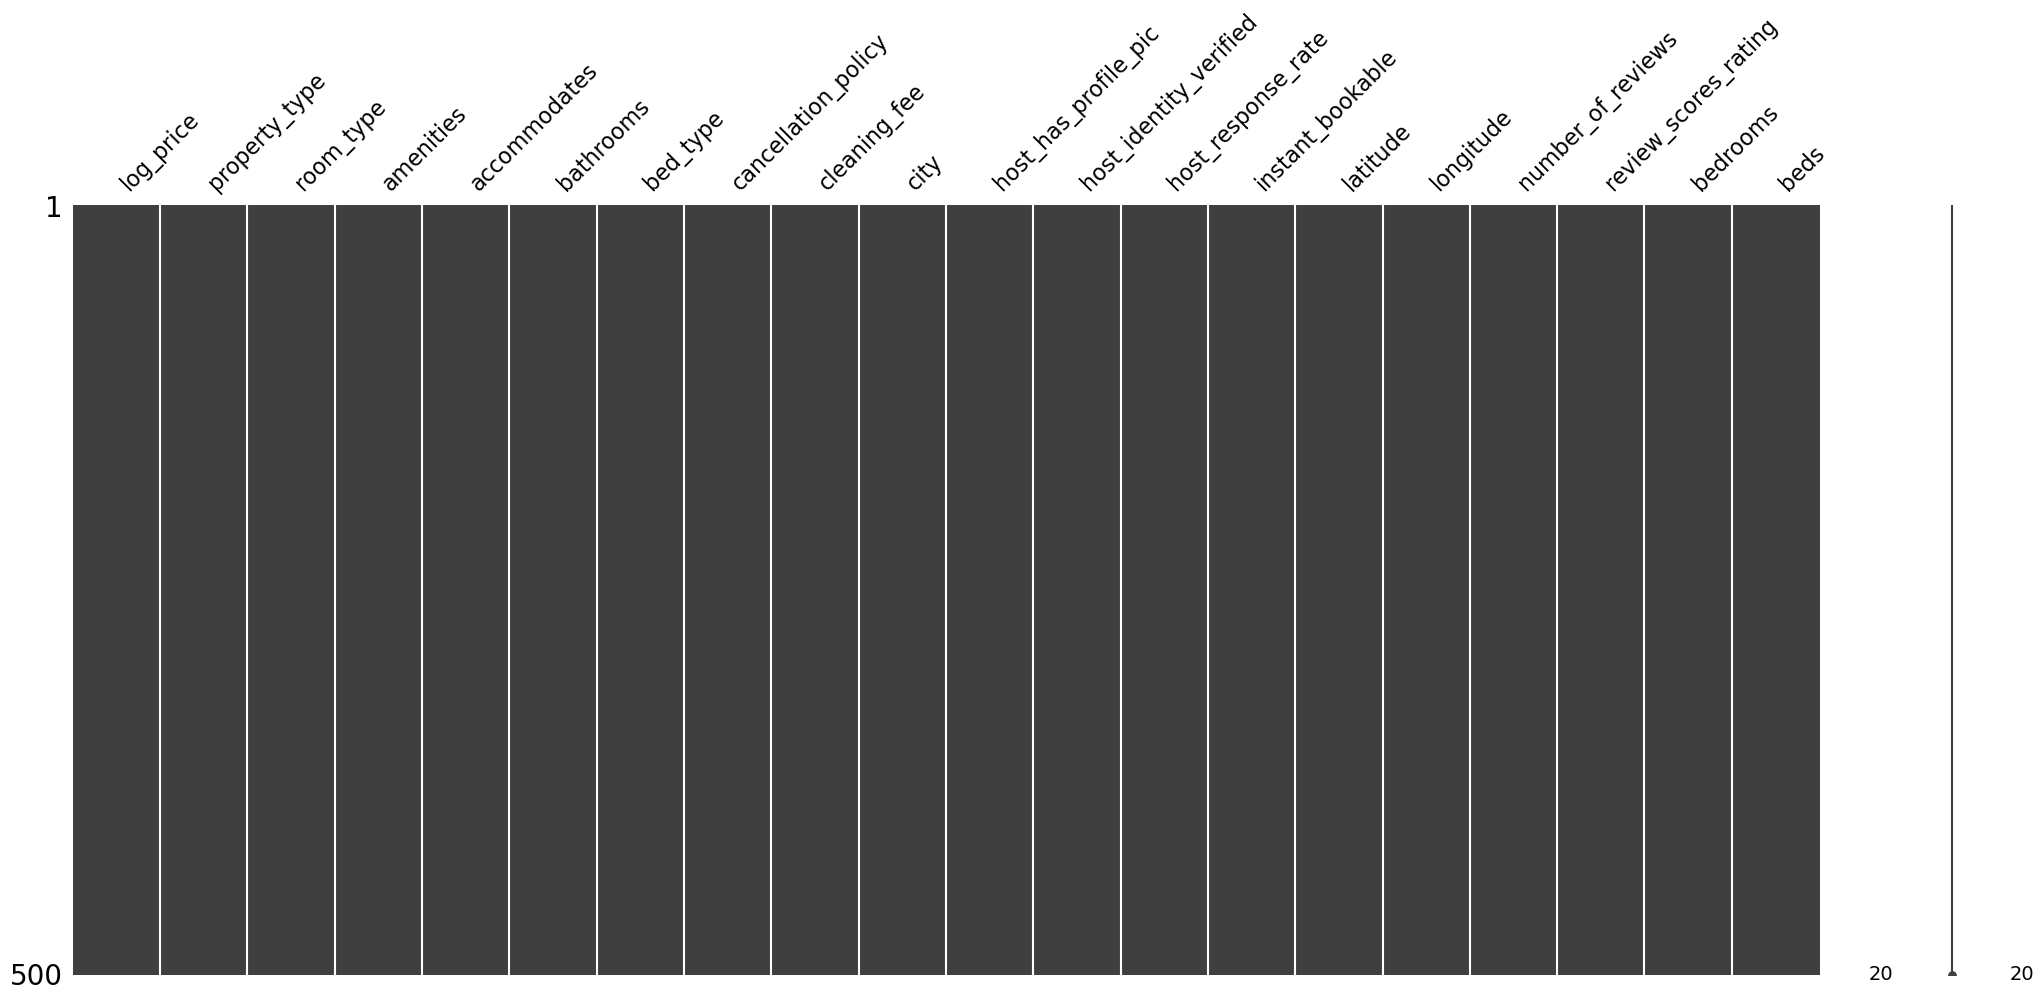

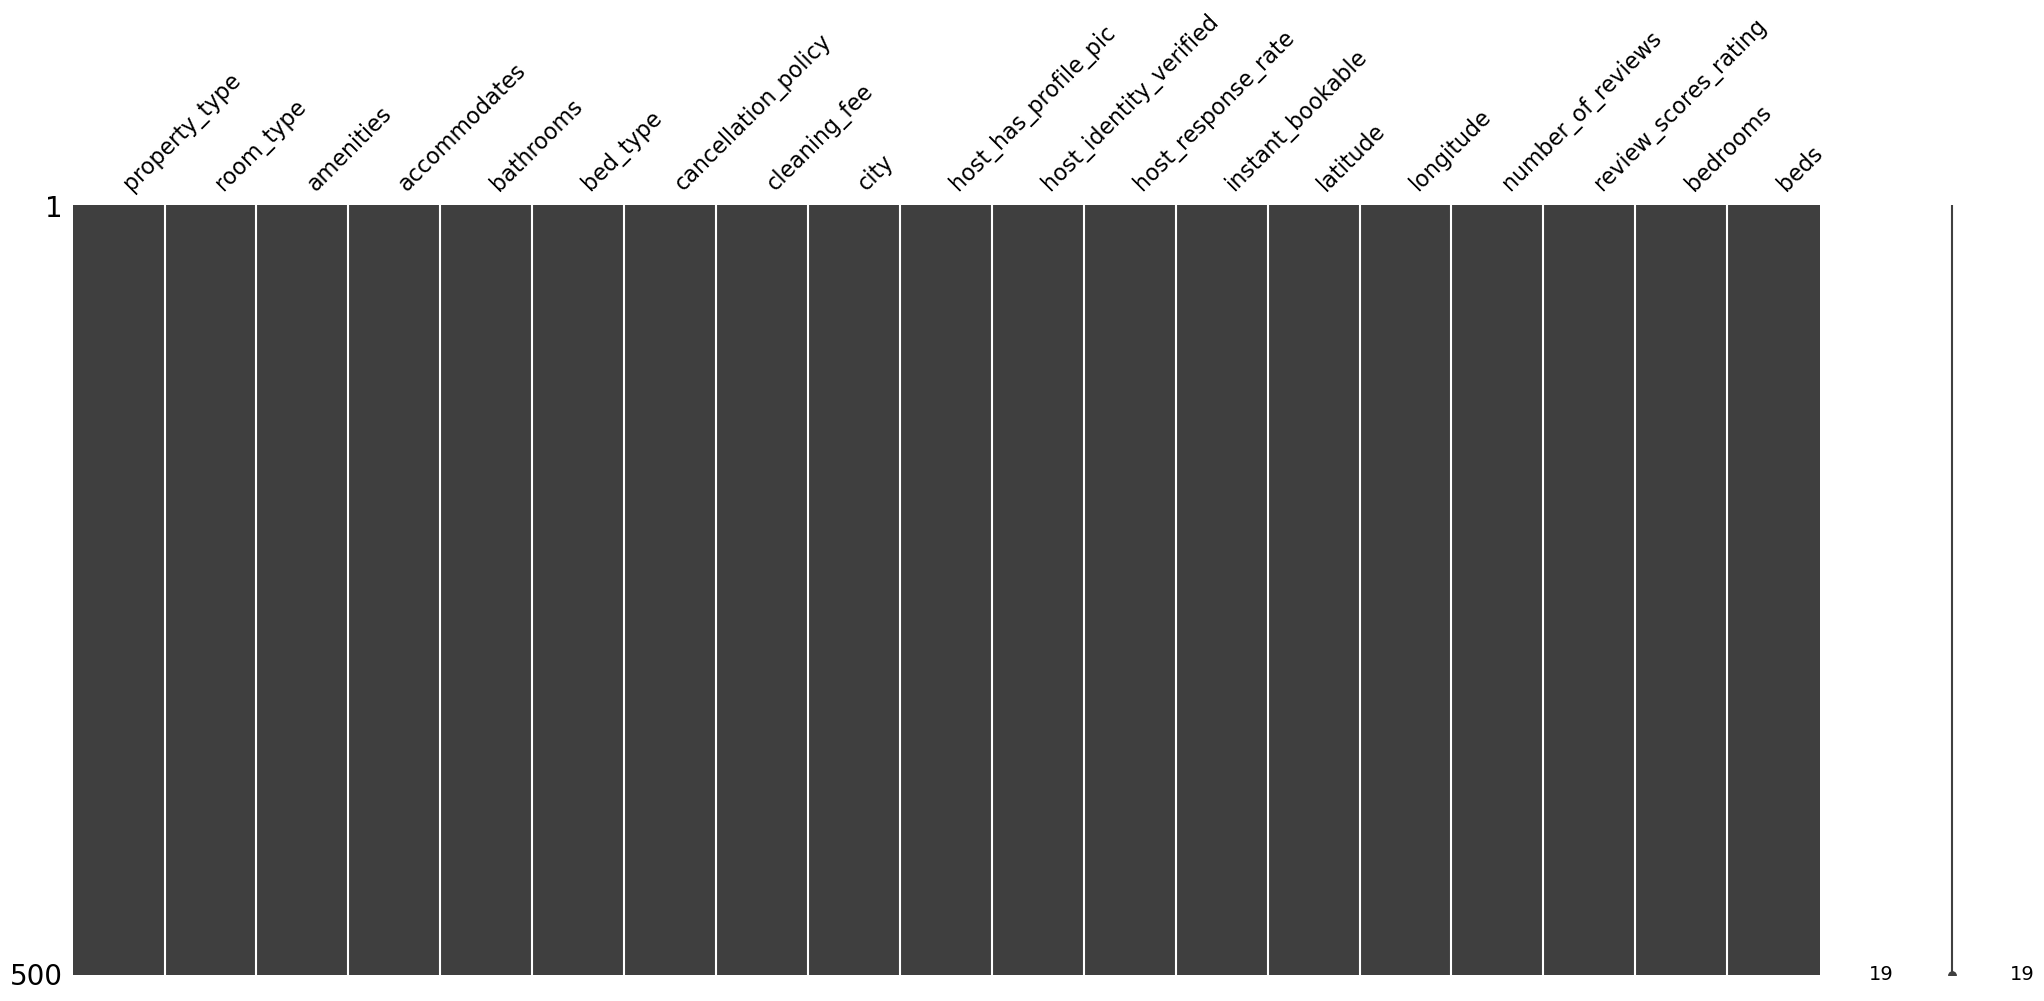

In [22]:
msno.matrix(airbnb_train.sample(500))
msno.matrix(airbnb_test.sample(500))

## Visualisation des données après transformation

### Données d'entraînement

In [23]:
airbnb_train

log_price  property_type  room_type  amenities  accommodates  \
0       4.317488            0.0          0         15             3   
1       4.007333            0.0          0         25             4   
2       7.090077            1.0          1         20             6   
3       3.555348            0.0          0         30             1   
4       5.480639            0.0          1         24             4   
...          ...            ...        ...        ...           ...   
22229   4.605170            1.0          0          1             1   
22230   5.043425            1.0          1         16             4   
22231   5.220356            1.0          1         31             5   
22232   5.273000            1.0          1         15             2   
22233   4.852030           11.0          1         18             4   

       bathrooms  bed_type  cancellation_policy  cleaning_fee  city  \
0            1.0         0                    0             0     0   
1            2.0         0                    1             0     1   
2            2.0         0                    0             0     2   
3            1.0         0                    0             1     1   
4            1.0         0                    2             1     3   
...          ...       ...                  ...           ...   ...   
22229        1.0         0                    0             0     1   
22230        2.0         0                    2             1     0   
22231        1.0         0                    2             1     1   
22232        1.0         0                    1             1     1   
22233        1.0         0                    2             0     0   

       host_has_profile_pic  host_identity_verified  host_response_rate  \
0                         0                       0                  -1   
1                         0                       1                 100   
2                         0                       0                  -1   
3                         0                       1                 100   
4                         0                       1                 100   
...                     ...                     ...                 ...   
22229                     0                       1                  -1   
22230                     0                       0                 100   
22231                     0                       1                 100   
22232                     0                       0                 100   
22233                     0                       1                 100   

       instant_bookable   latitude   longitude  number_of_reviews  \
0                     0  33.782712 -118.134410                  0   
1                     0  40.705468  -73.909439                 38   
2                     0  38.917537  -77.031651                  0   
3                     1  40.736001  -73.924248                 19   
4                     1  37.744896 -122.430665                 15   
...                 ...        ...         ...                ...   
22229                 1  40.709025  -73.939405                  0   
22230                 1  33.871549 -118.396053                 16   
22231                 0  40.706749  -73.942377                 43   
22232                 0  40.738535  -74.000157                  0   
22233                 1  33.761096 -118.192409                205   

       review_scores_rating  bedrooms  beds  
0                      -1.0       0.0   2.0  
1                      86.0       1.0   2.0  
2                      -1.0       2.0   2.0  
3                      96.0       1.0   1.0  
4                      96.0       2.0   2.0  
...                     ...       ...   ...  
22229                  -1.0       1.0   1.0  
22230                  93.0       2.0   4.0  
22231                  94.0       2.0   2.0  
22232                  -1.0       0.0   2.0  
22233                  96.0       1.0   2.0  

[22234 rows x 20 c

In [24]:
airbnb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22234 entries, 0 to 22233
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               22234 non-null  float64
 1   property_type           22234 non-null  float64
 2   room_type               22234 non-null  int64  
 3   amenities               22234 non-null  int64  
 4   accommodates            22234 non-null  int64  
 5   bathrooms               22234 non-null  float64
 6   bed_type                22234 non-null  int64  
 7   cancellation_policy     22234 non-null  int64  
 8   cleaning_fee            22234 non-null  int64  
 9   city                    22234 non-null  int64  
 10  host_has_profile_pic    22234 non-null  int64  
 11  host_identity_verified  22234 non-null  int64  
 12  host_response_rate      22234 non-null  int32  
 13  instant_bookable        22234 non-null  int64  
 14  latitude                22234 non-null

### Données de test

In [25]:
airbnb_test

property_type  room_type  amenities  accommodates  bathrooms  bed_type  \
0                1.0          1          9             3        1.0         0   
1                1.0          1         15             7        1.0         0   
2                1.0          1         19             5        1.0         0   
3                0.0          1         15             4        1.0         0   
4                1.0          1         12             2        1.0         0   
...              ...        ...        ...           ...        ...       ...   
51872            0.0          1         20             4        1.0         0   
51873            0.0          1         42             4        1.0         0   
51874            1.0          1         13             3        1.0         0   
51875            0.0          0         15             4        1.0         0   
51876            1.0          1         15             3        1.0         0   

       cancellation_policy  cleaning_fee  city  host_has_profile_pic  \
0                        1             1     1                     0   
1                        1             1     1                     0   
2                        2             1     1                     0   
3                        0             1     3                     0   
4                        2             1     2                     0   
...                    ...           ...   ...                   ...   
51872                    0             0     0                     0   
51873                    2             1     1                     0   
51874                    1             1     1                     0   
51875                    2             1     0                     0   
51876                    0             1     3                     1   

       host_identity_verified  host_response_rate  instant_bookable  \
0                           1                  -1                 1   
1                           0                 100                 0   
2                           1                 100                 0   
3                           1                  -1                 1   
4                           1                 100                 0   
...                       ...                 ...               ...   
51872                       1                  -1                 1   
51873                       0                 100                 1   
51874                       0                  36                 1   
51875                       1                 100                 1   
51876                       0                  -1                 1   

        latitude   longitude  number_of_reviews  review_scores_rating  \
0      40.696524  -73.991617                  2                 100.0   
1      40.766115  -73.989040                  6                  93.0   
2      40.808110  -73.943756                 10                  92.0   
3      37.772004 -122.431619                  0                  -1.0   
4      38.925627  -77.034596                  4                  40.0   
...          ...         ...                ...                   ...   
51872  34.156056 -118.235445                  0                  -1.0   
51873  40.765323  -73.961502                 22                  98.0   
51874  40.770700  -73.963228                  3                  73.0   
51875  34.099417 -118.276401                 69                  96.0   
51876  37.777291 -122.412377                  0                  -1.0   

       bedrooms  beds  
0           1.0   1.0  
1           3.0   3.0  
2           1.0   3.0  
3           2.0   2.0  
4           0.0   1.0  
...         ...   ...  
51872       1.0   1.0  
51873       2.0   3.0  
51874       0.0   2.0  
51875       1.0   2.0  
51876       0.0   1.0  

[51877 rows x 19 columns]

In [26]:
airbnb_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51877 entries, 0 to 51876
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_type           51877 non-null  float64
 1   room_type               51877 non-null  int64  
 2   amenities               51877 non-null  int64  
 3   accommodates            51877 non-null  int64  
 4   bathrooms               51877 non-null  float64
 5   bed_type                51877 non-null  int64  
 6   cancellation_policy     51877 non-null  int64  
 7   cleaning_fee            51877 non-null  int64  
 8   city                    51877 non-null  int64  
 9   host_has_profile_pic    51877 non-null  int64  
 10  host_identity_verified  51877 non-null  int64  
 11  host_response_rate      51877 non-null  int32  
 12  instant_bookable        51877 non-null  int64  
 13  latitude                51877 non-null  float64
 14  longitude               51877 non-null

## III-d) Sauvegarde dans un fichier

In [27]:
airbnb_train.to_csv('airbnb_train_cleaned.csv', index=False)
airbnb_test.to_csv('airbnb_test_cleaned.csv', index=False)

## IV- Verfication

In [28]:
airbnb_train_cleaned = pd.read_csv("airbnb_train_cleaned.csv")
airbnb_train_cleaned

log_price  property_type  room_type  amenities  accommodates  \
0       4.317488            0.0          0         15             3   
1       4.007333            0.0          0         25             4   
2       7.090077            1.0          1         20             6   
3       3.555348            0.0          0         30             1   
4       5.480639            0.0          1         24             4   
...          ...            ...        ...        ...           ...   
22229   4.605170            1.0          0          1             1   
22230   5.043425            1.0          1         16             4   
22231   5.220356            1.0          1         31             5   
22232   5.273000            1.0          1         15             2   
22233   4.852030           11.0          1         18             4   

       bathrooms  bed_type  cancellation_policy  cleaning_fee  city  \
0            1.0         0                    0             0     0   
1            2.0         0                    1             0     1   
2            2.0         0                    0             0     2   
3            1.0         0                    0             1     1   
4            1.0         0                    2             1     3   
...          ...       ...                  ...           ...   ...   
22229        1.0         0                    0             0     1   
22230        2.0         0                    2             1     0   
22231        1.0         0                    2             1     1   
22232        1.0         0                    1             1     1   
22233        1.0         0                    2             0     0   

       host_has_profile_pic  host_identity_verified  host_response_rate  \
0                         0                       0                  -1   
1                         0                       1                 100   
2                         0                       0                  -1   
3                         0                       1                 100   
4                         0                       1                 100   
...                     ...                     ...                 ...   
22229                     0                       1                  -1   
22230                     0                       0                 100   
22231                     0                       1                 100   
22232                     0                       0                 100   
22233                     0                       1                 100   

       instant_bookable   latitude   longitude  number_of_reviews  \
0                     0  33.782712 -118.134410                  0   
1                     0  40.705468  -73.909439                 38   
2                     0  38.917537  -77.031651                  0   
3                     1  40.736001  -73.924248                 19   
4                     1  37.744896 -122.430665                 15   
...                 ...        ...         ...                ...   
22229                 1  40.709025  -73.939405                  0   
22230                 1  33.871549 -118.396053                 16   
22231                 0  40.706749  -73.942377                 43   
22232                 0  40.738535  -74.000157                  0   
22233                 1  33.761096 -118.192409                205   

       review_scores_rating  bedrooms  beds  
0                      -1.0       0.0   2.0  
1                      86.0       1.0   2.0  
2                      -1.0       2.0   2.0  
3                      96.0       1.0   1.0  
4                      96.0       2.0   2.0  
...                     ...       ...   ...  
22229                  -1.0       1.0   1.0  
22230                  93.0       2.0   4.0  
22231                  94.0       2.0   2.0  
22232                  -1.0       0.0   2.0  
22233                  96.0       1.0   2.0  

[22234 rows x 20 c

In [29]:
airbnb_test_cleaned = pd.read_csv("airbnb_test_cleaned.csv")
airbnb_test_cleaned

property_type  room_type  amenities  accommodates  bathrooms  bed_type  \
0                1.0          1          9             3        1.0         0   
1                1.0          1         15             7        1.0         0   
2                1.0          1         19             5        1.0         0   
3                0.0          1         15             4        1.0         0   
4                1.0          1         12             2        1.0         0   
...              ...        ...        ...           ...        ...       ...   
51872            0.0          1         20             4        1.0         0   
51873            0.0          1         42             4        1.0         0   
51874            1.0          1         13             3        1.0         0   
51875            0.0          0         15             4        1.0         0   
51876            1.0          1         15             3        1.0         0   

       cancellation_policy  cleaning_fee  city  host_has_profile_pic  \
0                        1             1     1                     0   
1                        1             1     1                     0   
2                        2             1     1                     0   
3                        0             1     3                     0   
4                        2             1     2                     0   
...                    ...           ...   ...                   ...   
51872                    0             0     0                     0   
51873                    2             1     1                     0   
51874                    1             1     1                     0   
51875                    2             1     0                     0   
51876                    0             1     3                     1   

       host_identity_verified  host_response_rate  instant_bookable  \
0                           1                  -1                 1   
1                           0                 100                 0   
2                           1                 100                 0   
3                           1                  -1                 1   
4                           1                 100                 0   
...                       ...                 ...               ...   
51872                       1                  -1                 1   
51873                       0                 100                 1   
51874                       0                  36                 1   
51875                       1                 100                 1   
51876                       0                  -1                 1   

        latitude   longitude  number_of_reviews  review_scores_rating  \
0      40.696524  -73.991617                  2                 100.0   
1      40.766115  -73.989040                  6                  93.0   
2      40.808110  -73.943756                 10                  92.0   
3      37.772004 -122.431619                  0                  -1.0   
4      38.925627  -77.034596                  4                  40.0   
...          ...         ...                ...                   ...   
51872  34.156056 -118.235445                  0                  -1.0   
51873  40.765323  -73.961502                 22                  98.0   
51874  40.770700  -73.963228                  3                  73.0   
51875  34.099417 -118.276401                 69                  96.0   
51876  37.777291 -122.412377                  0                  -1.0   

       bedrooms  beds  
0           1.0   1.0  
1           3.0   3.0  
2           1.0   3.0  
3           2.0   2.0  
4           0.0   1.0  
...         ...   ...  
51872       1.0   1.0  
51873       2.0   3.0  
51874       0.0   2.0  
51875       1.0   2.0  
51876       0.0   1.0  

[51877 rows x 19 columns]

## Visualisations et interpretations
Avant de commencer à ajuster les données dans les modèles, il est utile d'explorer les données pour comprendre leur distribution. 


#### Visualisation générale

C:\Users\Janin\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Janin\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


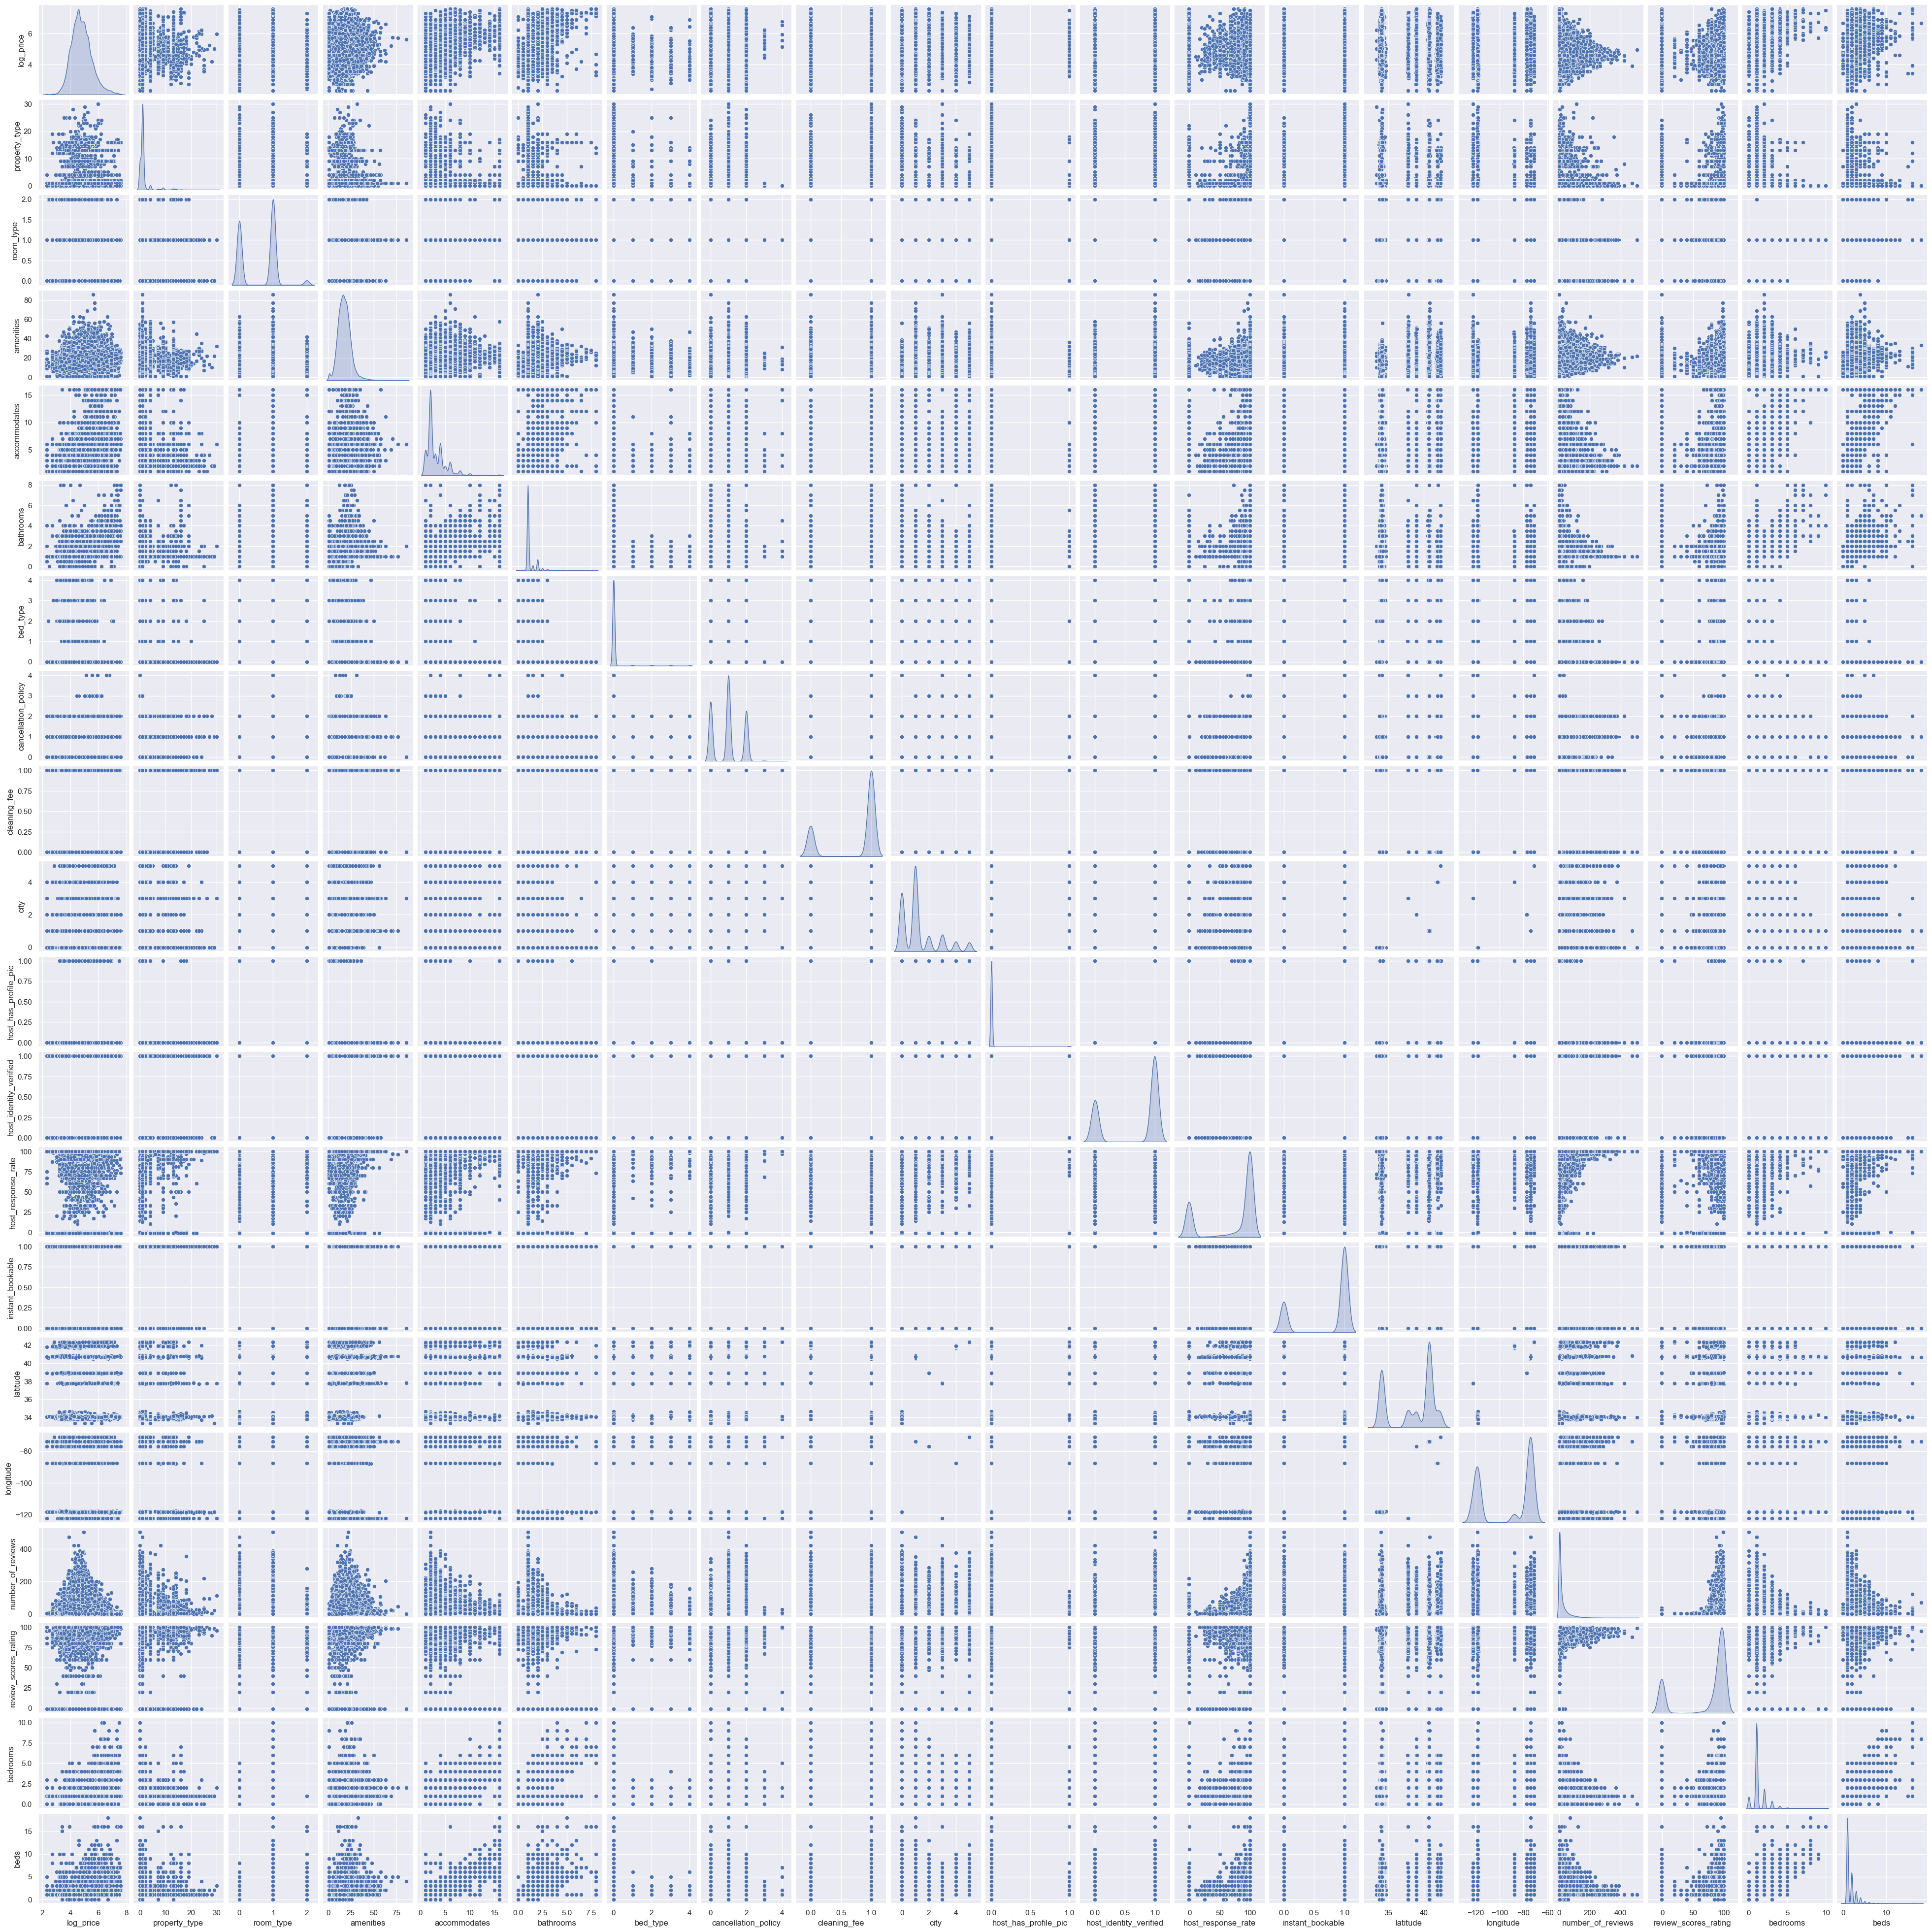

In [30]:
sns.set()
sns.pairplot(airbnb_train_cleaned,size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

Regardons les corrélations entre les variables.

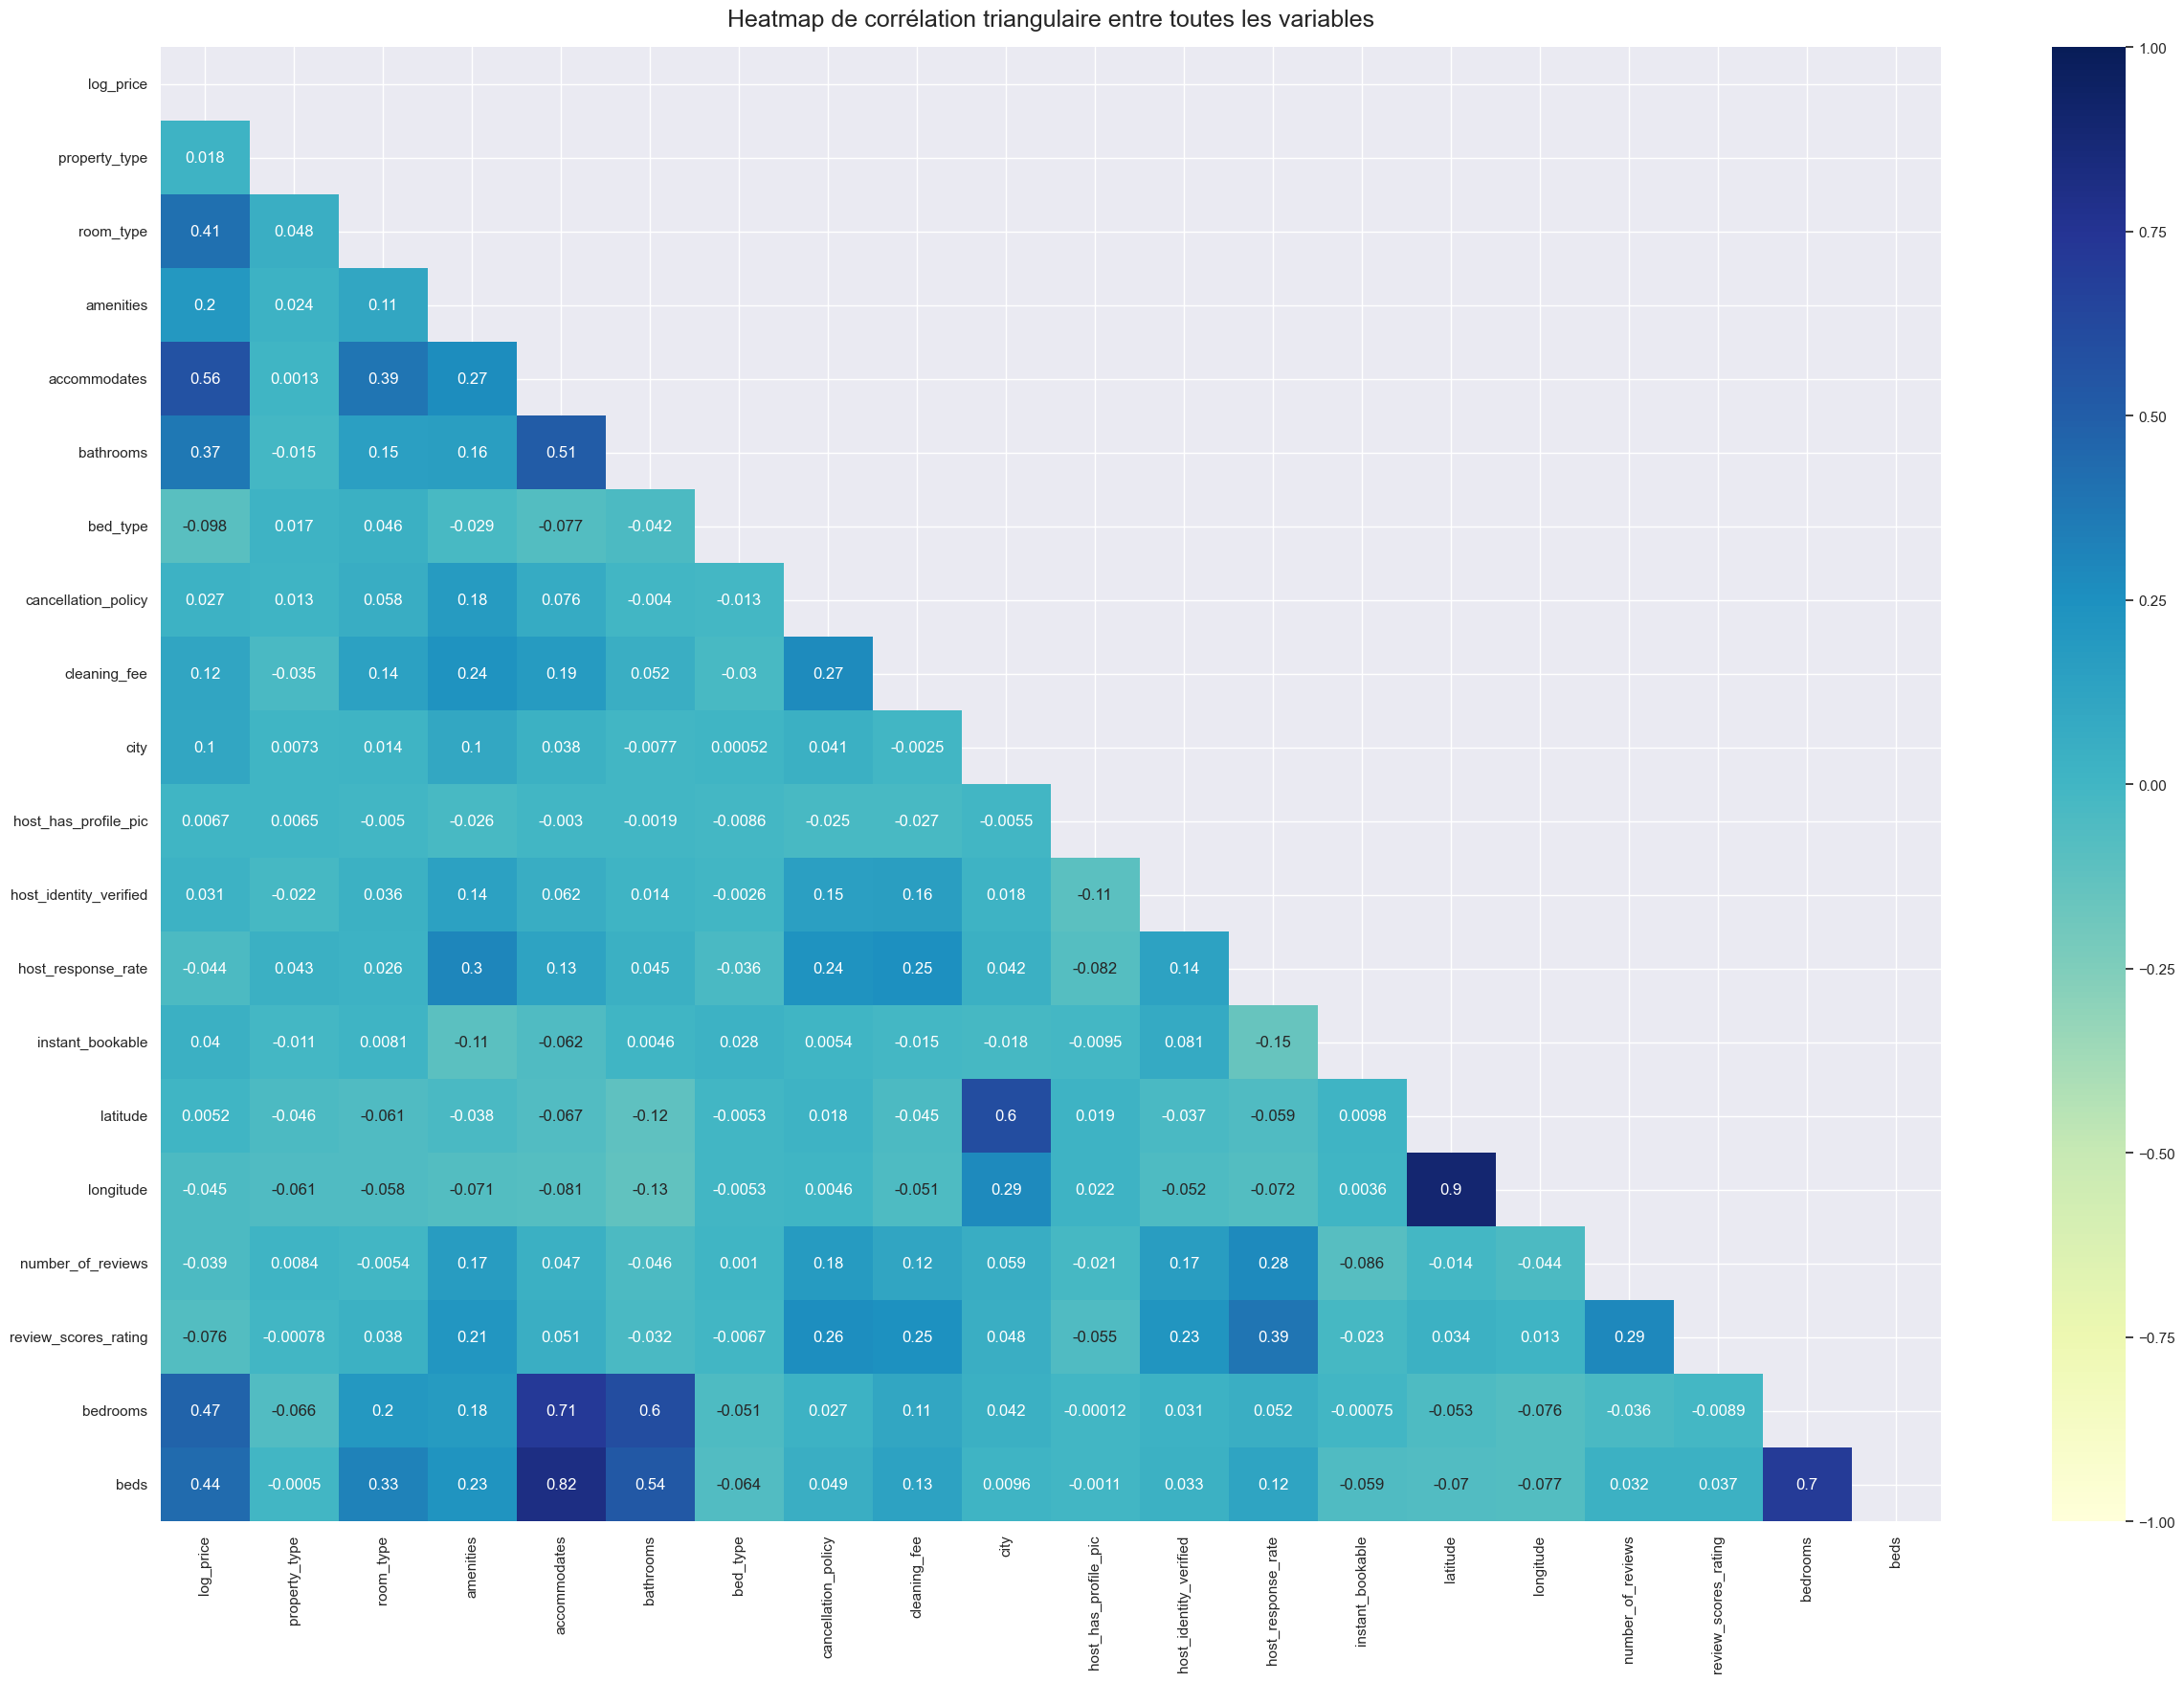

In [31]:
plt.figure(figsize=(30, 20))

# define the mask to set the values in the upper triangle to True -- makes it easier to read
mask = np.triu(np.ones_like(airbnb_train_cleaned.corr(), dtype=bool))

heatmap = sns.heatmap(airbnb_train_cleaned.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='YlGnBu')

heatmap.set_title('Heatmap de corrélation triangulaire entre toutes les variables', fontdict={'fontsize':18}, pad=16);

Là où nous observons des carrés plus foncés, les variables sont plus corrélées.

La corrélation entre les variables est cohérente. Le nombre de personnes pouvant être logées (accommodates) dépend évidemment du nombre de lits et de chambres (beds et bedrooms). La corrélation est positive car plus de chambres et de lits permettent évidemment de loger plus de personnes.

En ce qui concerne le prix, nous observons les plus fortes corrélations avec le nombre de lits, de chambres, de salles de bains, du nombre de personnes logées et du type de chambre. Cela semble assez logique. Nous visualisons ces relations de plus près:

####  Quelles sont les caractéristiques les plus courantes des biens ? Comment les caractéristiques des biens influent-elles sur le prix ?

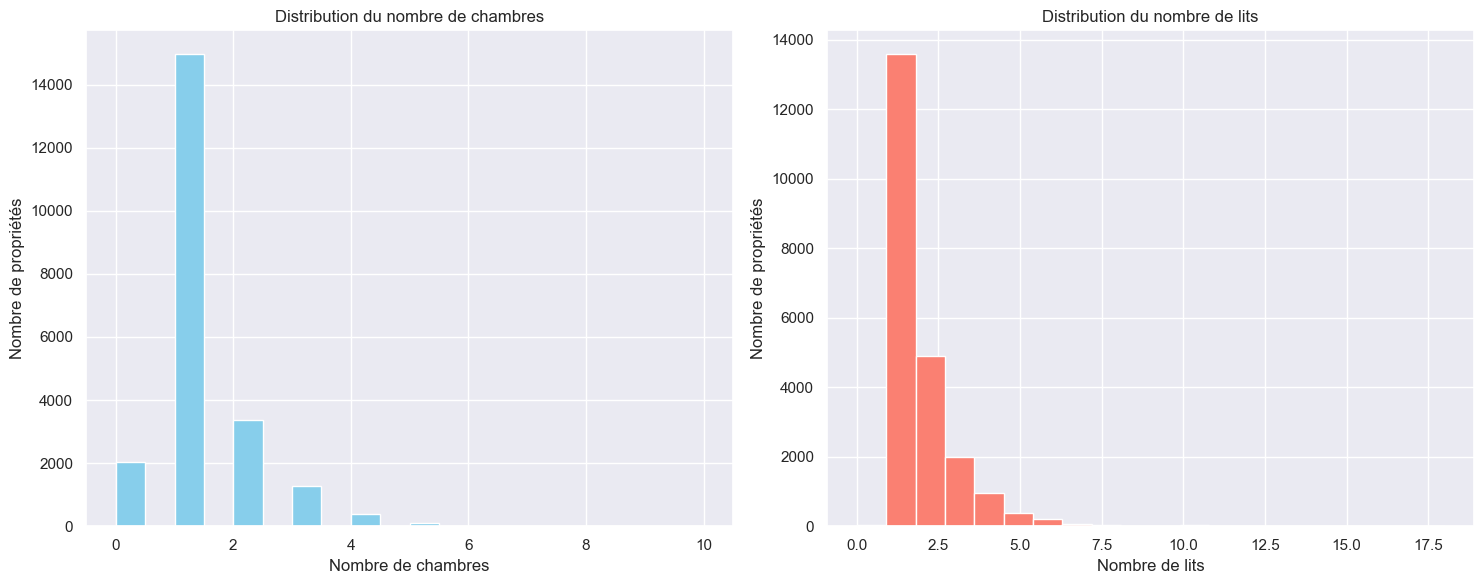

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Histogramme du nombre de chambres
axs[0].hist(airbnb_train_cleaned['bedrooms'], bins=int(180/9), color='skyblue')
axs[0].set_title('Distribution du nombre de chambres')
axs[0].set_xlabel('Nombre de chambres')
axs[0].set_ylabel('Nombre de propriétés')

# Histogramme du nombre de lits
axs[1].hist(airbnb_train_cleaned['beds'], bins=int(180/9), color='salmon')
axs[1].set_title('Distribution du nombre de lits')
axs[1].set_xlabel('Nombre de lits')
axs[1].set_ylabel('Nombre de propriétés')

# Affiche
plt.tight_layout()
plt.show()


Une grande proportion des annonces proposent uniquement une chambre à coucher. Le nombre de biens diminue lorsque le nombre de chambres proposées diminue, et la plupart des annonces sur le marché n'offrent pas plus de 4 chambres au total.

Une grande proportion des annonces proposent 1 à 3 lits, tandis qu'un petit nombre d'hôtes proposent plus de 4 lits. La tendance du nombre de lits est similaire à celle du nombre de chambres, car le nombre d'annonces diminue en fonction de la diminution du nombre de lits. 

On pourrait mieux visualiser cette répartition grâce à un graphique circulaire:

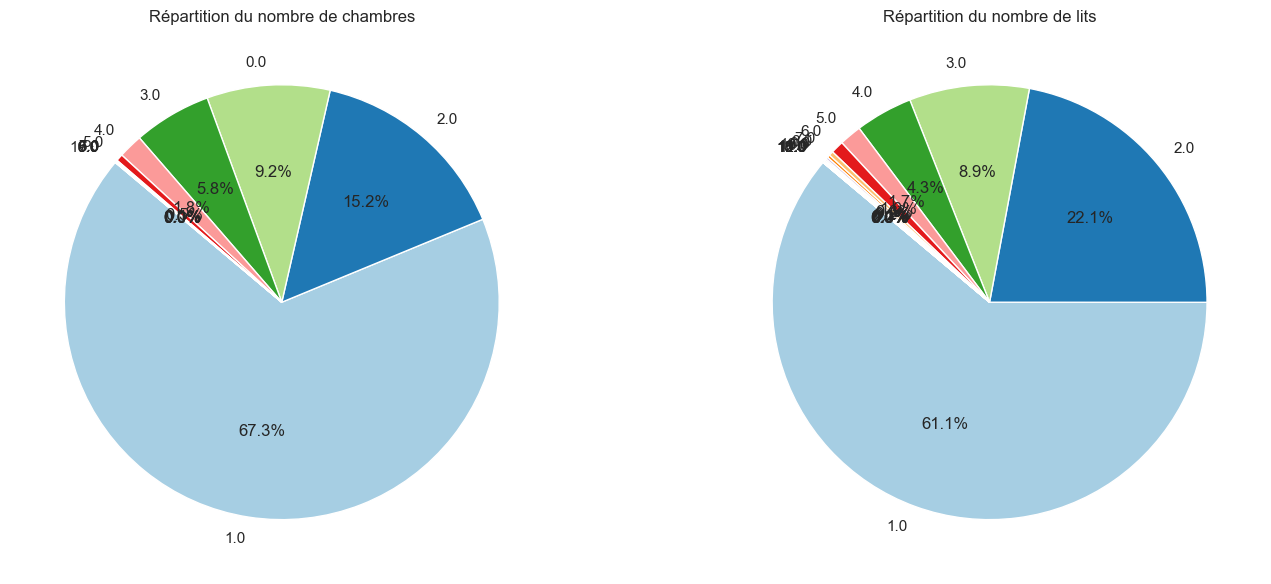

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Distribution du nombre de chambres
nb_bedrooms = airbnb_train_cleaned['bedrooms'].value_counts()
axs[0].pie(nb_bedrooms, labels=nb_bedrooms.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(nb_bedrooms))))
axs[0].set_title('Répartition du nombre de chambres')

# Distribution du nombre de lits
nb_beds = airbnb_train_cleaned['beds'].value_counts()
axs[1].pie(nb_beds, labels=nb_beds.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(nb_beds))))
axs[1].set_title('Répartition du nombre de lits')

# Affiche
plt.tight_layout()
plt.show()


#### Relation nombre de chambre/prix

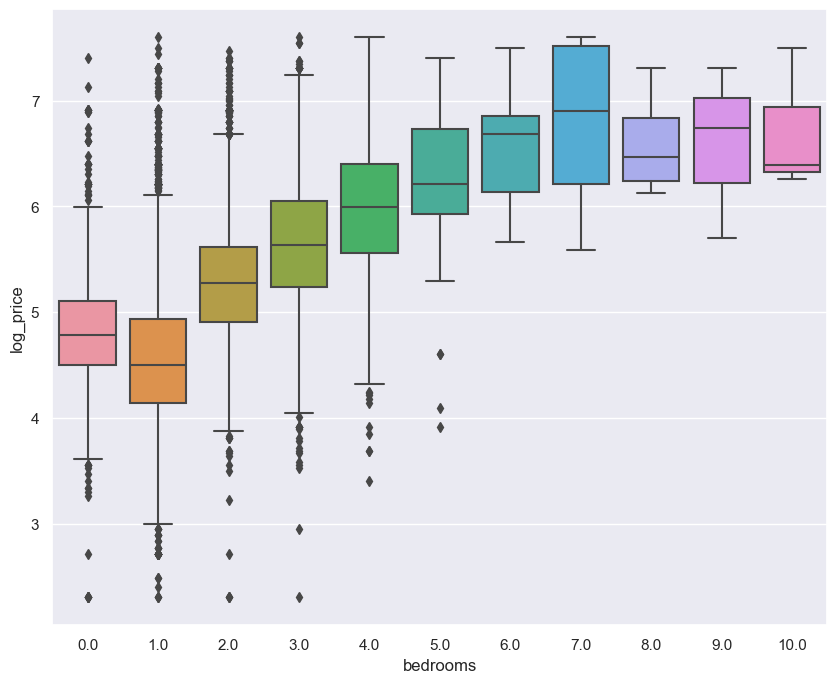

In [34]:
plt.figure(figsize=(10,8))

sns.set(style="darkgrid")
sns.boxplot( x=airbnb_train_cleaned['bedrooms'], y=airbnb_train_cleaned["log_price"] )

plt.show()

D'après le diagramme en boîte, les annonces avec 7 ou 9 chambres semblent avoir les prix les plus élevés. Lorsque le nombre de chambres est inférieur à 7, le prix de l'annonce augmente à mesure que le nombre de chambres augmente, ce qui est conforme à notre attente selon laquelle plus de chambres entraînent des prix plus élevés. Il est cependant surprenant de constater que le prix des annonces avec 8,9 ou 10 chambres est nettement inférieur à celui des annonces avec 7 chambres.

#### Relation localisation/prix

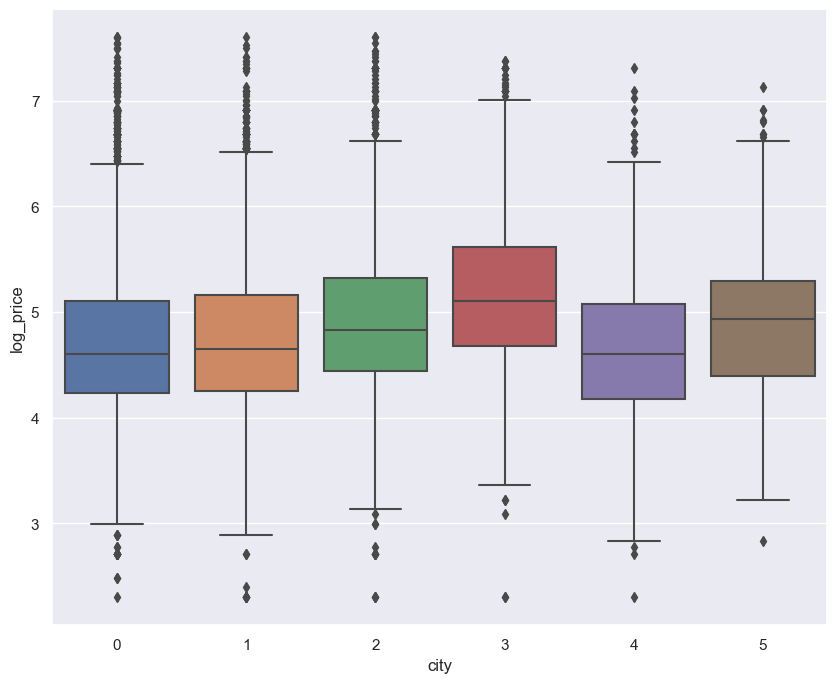

In [35]:
plt.figure(figsize=(10,8))

sns.set(style="darkgrid")
sns.boxplot( x=airbnb_train_cleaned['city'], y=airbnb_train_cleaned["log_price"] )

plt.show()

À notre grande surprise, la ville n'influence pas vraiment le prix. Il pourrait être plus clair de l'analyser en fonction de la longitude et de la latitude.

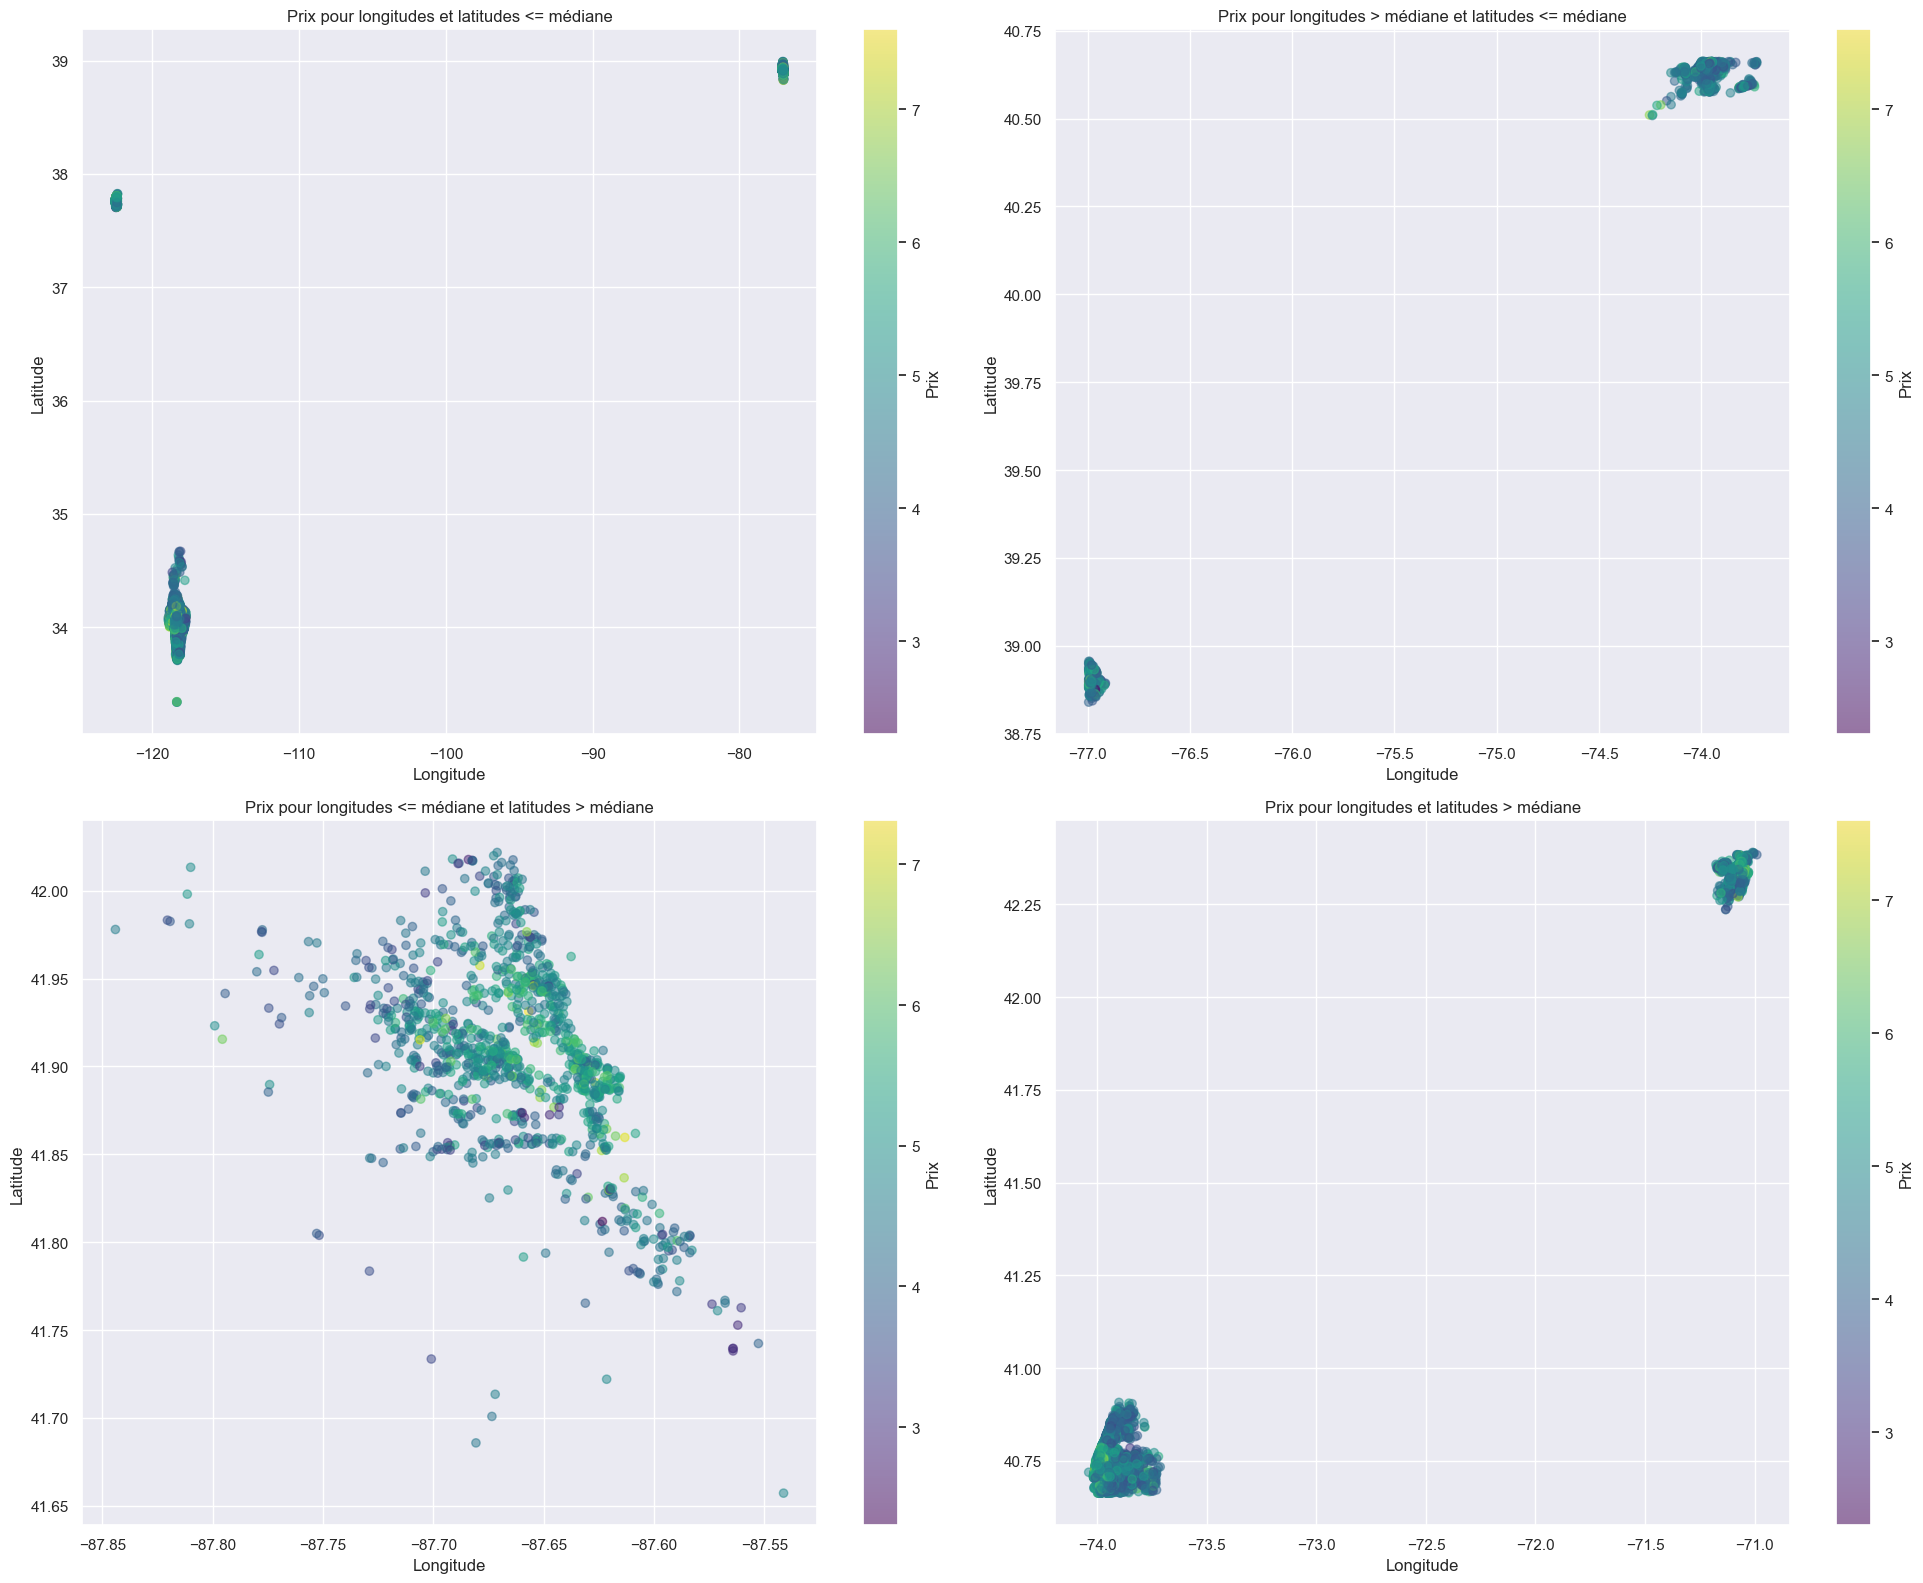

In [36]:
import matplotlib.pyplot as plt

# Diviser les données en quatre groupes basés sur la longitude et la latitude
midpoint_longitude = airbnb_train_cleaned['longitude'].median()
midpoint_latitude = airbnb_train_cleaned['latitude'].median()

# Groupe 1 : Longitudes inférieures ou égales à la médiane et latitudes inférieures ou égales à la médiane
group1 = airbnb_train_cleaned[(airbnb_train_cleaned['longitude'] <= midpoint_longitude) & (airbnb_train_cleaned['latitude'] <= midpoint_latitude)]

# Groupe 2 : Longitudes supérieures à la médiane et latitudes inférieures ou égales à la médiane
group2 = airbnb_train_cleaned[(airbnb_train_cleaned['longitude'] > midpoint_longitude) & (airbnb_train_cleaned['latitude'] <= midpoint_latitude)]

# Groupe 3 : Longitudes inférieures ou égales à la médiane et latitudes supérieures à la médiane
group3 = airbnb_train_cleaned[(airbnb_train_cleaned['longitude'] <= midpoint_longitude) & (airbnb_train_cleaned['latitude'] > midpoint_latitude)]

# Groupe 4 : Longitudes supérieures à la médiane et latitudes supérieures à la médiane
group4 = airbnb_train_cleaned[(airbnb_train_cleaned['longitude'] > midpoint_longitude) & (airbnb_train_cleaned['latitude'] > midpoint_latitude)]

# Créer les sous-graphes
fig, axs = plt.subplots(2, 2, figsize=(20, 16))

# Nuage de points pour le groupe 1
axs[0, 0].scatter(group1['longitude'], group1['latitude'], c=group1['log_price'], cmap='viridis', alpha=0.5)
axs[0, 0].set_title("Prix pour longitudes et latitudes <= médiane")
axs[0, 0].set_xlabel("Longitude")
axs[0, 0].set_ylabel("Latitude")
cbar1 = plt.colorbar(axs[0, 0].collections[0], ax=axs[0, 0])
cbar1.set_label('Prix')

# Nuage de points pour le groupe 2
axs[0, 1].scatter(group2['longitude'], group2['latitude'], c=group2['log_price'], cmap='viridis', alpha=0.5)
axs[0, 1].set_title("Prix pour longitudes > médiane et latitudes <= médiane")
axs[0, 1].set_xlabel("Longitude")
axs[0, 1].set_ylabel("Latitude")
cbar2 = plt.colorbar(axs[0, 1].collections[0], ax=axs[0, 1])
cbar2.set_label('Prix')

# Nuage de points pour le groupe 3
axs[1, 0].scatter(group3['longitude'], group3['latitude'], c=group3['log_price'], cmap='viridis', alpha=0.5)
axs[1, 0].set_title("Prix pour longitudes <= médiane et latitudes > médiane")
axs[1, 0].set_xlabel("Longitude")
axs[1, 0].set_ylabel("Latitude")
cbar3 = plt.colorbar(axs[1, 0].collections[0], ax=axs[1, 0])
cbar3.set_label('Prix')

# Nuage de points pour le groupe 4
axs[1, 1].scatter(group4['longitude'], group4['latitude'], c=group4['log_price'], cmap='viridis', alpha=0.5)
axs[1, 1].set_title("Prix pour longitudes et latitudes > médiane")
axs[1, 1].set_xlabel("Longitude")
axs[1, 1].set_ylabel("Latitude")
cbar4 = plt.colorbar(axs[1, 1].collections[0], ax=axs[1, 1])
cbar4.set_label('Prix')

# Afficher les graphiques
plt.tight_layout()
plt.show()


#### Relation nb equipement/prix

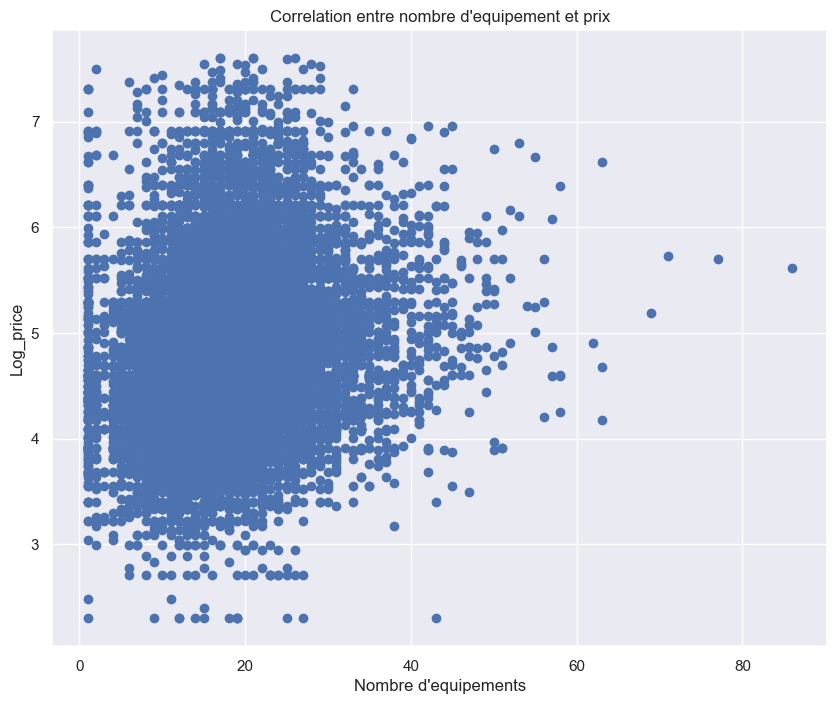

In [37]:
plt.figure(figsize=(10,8))

# adds the title
plt.title("Correlation entre nombre d'equipement et prix")

# plot the data
plt.scatter(airbnb_train_cleaned['amenities'], airbnb_train_cleaned['log_price'])

# Labelling axes
plt.xlabel("Nombre d'equipements")
plt.ylabel('Log_price')
plt.show()